## Pre-Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import os
import pathlib
import sys
result_dict={}

In [ ]:
import warnings
# warnings.filterwarnings('ignore') ### see https://stackoverflow.com/a/9031848
# warnings.filterwarnings('default')
warnings.filterwarnings(action='once')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
drive_project_folder_path='/content/drive/MyDrive/ml-ai files arjun'
internship_folder_path=f'{drive_project_folder_path}/tcs_internship'

tweet_emotion_dataworld_data_path=f'{drive_project_folder_path}/tcs_internship/text_emotion_dataworld_webinar.csv'
airline_tweet_data_path=f'{drive_project_folder_path}/tcs_internship/Tweets_airline_kaggle.csv'

datafile_path= airline_tweet_data_path
# datafile_path=f'{drive_project_folder_path}/tweet_emotions.csv'
# datafile_path=f'{drive_project_folder_path}/tweets.csv'


df = pd.read_csv(datafile_path)
old_df=pd.read_csv(f'{drive_project_folder_path}/tweets.csv')
df


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


#### dataworld data specific eda

In [ ]:
## no need to attempt specialising the analysis with respect to the author's persona because the number of comments per author is meager compared to dataset size
# df['author'].value_counts()
# print(df['author'].value_counts().mean())
if datafile_path==tweet_emotion_dataworld_data_path :
    df['tweet_id'].nunique() ## tweet id is unique;
    # df=df.set_index('tweet_id') ### ; it is better to use it as index
    # df.to_markdown()

    # def convert_emotion_to_sentiment(emotion:str):
    #     NEGATIVE_EMOTIONS=['sadness','worry','hate','boredom','anger','empty']
    #     POSITIVE_EMOTIONS=['happiness','love','surprise','fun','relief','enthusiasm']
    #     if emotion in NEGATIVE_EMOTIONS:
    #         return 'negative'
    #     elif emotion in POSITIVE_EMOTIONS:
    #         return 'positive'
    #     elif emotion == 'neutral':
    #         return 'neutral'

    df=df.loc[~df['sentiment'].isin(['enthusiasm','anger','boredom','empty'])]

    # df[target_col_name]=df[target_col_name].apply(convert_emotion_to_sentiment)
    # num_targets=3
    # df
    ## data too big system crashes
    # df=df.iloc[1:15000,:]
    df.shape

    # original_df=df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### dataworld data specific eda ends

#### airline data specific eda

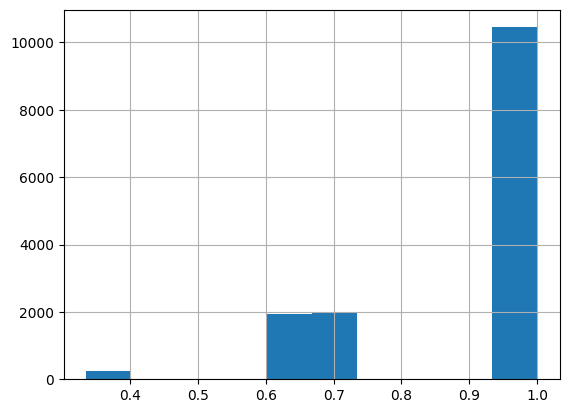

In [ ]:
if datafile_path==airline_tweet_data_path :
    df['airline_sentiment_confidence'].hist()
    df=df[df['airline_sentiment_confidence'] >= 0.9]
    df.to_markdown()

#### airline data specific eda ends

In [ ]:
### data specific

if datafile_path==tweet_emotion_dataworld_data_path :
    text_col_name='content'
    target_col_name='sentiment'

if datafile_path==airline_tweet_data_path :
    text_col_name='text'
    target_col_name='airline_sentiment'


In [ ]:
# df.columns=['tweet_id','sentiment','author','content']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10458 entries, 0 to 14638
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      10458 non-null  int64  
 1   airline_sentiment             10458 non-null  object 
 2   airline_sentiment_confidence  10458 non-null  float64
 3   negativereason                7391 non-null   object 
 4   negativereason_confidence     7395 non-null   float64
 5   airline                       10458 non-null  object 
 6   airline_sentiment_gold        36 non-null     object 
 7   name                          10458 non-null  object 
 8   negativereason_gold           29 non-null     object 
 9   retweet_count                 10458 non-null  int64  
 10  text                          10458 non-null  object 
 11  tweet_coord                   745 non-null    object 
 12  tweet_created                 10458 non-null  object 
 13  t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

(10458, 15)

In [ ]:
num_targets=df[target_col_name].nunique()
num_targets

3

In [ ]:
df[target_col_name].value_counts()

negative    7391
neutral     1550
positive    1517
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
### data too big system crashes
# df=df.iloc[1:15000,:]
# df.shape

# original_df=df.copy()

In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
### check for missing values
print(df[target_col_name].isna().sum())
df[text_col_name].isna().sum()


0


0

In [ ]:
# df['sentiment'][1]

In [ ]:
## drop all unnecessary cols

# df=df.drop('author',axis=1)
# df=df.drop('tweet_id',axis=1)

# all_cols_list=df.columns.tolist()
# unnecessary_cols_list=[col for col in all_cols_list if col not in [text_col_name,target_col_name]]
# df=df.drop(unnecessary_cols_list,axis=1)
# ### middle section
# df.iloc[148:168,:]

In [ ]:
def gen_preprocess_df_return_Xy(df=df,target_col_name=target_col_name,text_col_name=text_col_name):
    num_targets=df[target_col_name].nunique()


    ## drop all unnecessary cols
    all_cols_list=df.columns.tolist()
    unnecessary_cols_list=[col for col in all_cols_list if col not in [text_col_name,target_col_name]]
    df=df.drop(unnecessary_cols_list,axis=1)

    X=df.drop(target_col_name,axis=1)
    y=df[target_col_name].copy() ###ak
    return X,y


X,y=gen_preprocess_df_return_Xy(df)

# X=df.drop(target_col_name,axis=1)
# y=df[target_col_name].copy() ###ak

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
### encode y
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# y=y.values.reshape(-1,1)
y_np=le.fit_transform(y)
y[:]=y_np


target_cat_name_to_encoded_dict={ str(class_name) :idx for idx, class_name in enumerate(le.classes_)}
class_weight_dict={}
print(target_cat_name_to_encoded_dict)
for class_name,idx in target_cat_name_to_encoded_dict.items():
    class_weight_dict.update({ int(idx): (1/ float(df[target_col_name].value_counts()[class_name])
                                     )})
y

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

{'negative': 0, 'neutral': 1, 'positive': 2}


0        1
3        0
4        0
5        0
9        2
        ..
14631    0
14633    0
14636    0
14637    1
14638    0
Name: airline_sentiment, Length: 10458, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1,stratify=y)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
X_train.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8366, 1)

## Pre-processing

### basic text preprocessing functions

In [ ]:
import re

In [ ]:
from sklearn import metrics
from matplotlib import pyplot as plt
def get_conf_fscore(y_test,y_pred):
    y_test_to_use=y_test
    confusion_matrix= metrics.confusion_matrix(y_test_to_use,y_pred)
    # display_labels=[0,1] ## (manual)
    cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
    cm_display.plot()
    plt.show()
    try:
        model_name=model_name
    except Exception:
        model_name=''
    plt.savefig(f'{internship_folder_path}/conf_matrix_{model_name}_{datetime.now()}.png')


    ### accuracy metrics
    accuracy= metrics.accuracy_score(y_test_to_use,y_pred)
    recall= metrics.recall_score(y_test_to_use,y_pred,average='macro')
    # recall= metrics.recall_score(y_test_to_use,y_pred)
    recall0= metrics.recall_score(y_test_to_use,y_pred,pos_label=0,average='macro')

    precision= metrics.precision_score(y_test_to_use,y_pred,average='macro')
    precision0= metrics.precision_score(y_test_to_use,y_pred,pos_label=0,average='macro')

    f_score= 2*recall*precision/(recall+precision)

    print('accuracy is ',accuracy, '\n')
    print('recall for class 1 is ',recall, '\n')
    print('precision for class 1 is ',precision, '\n')
    print('recall for class 0 is ',recall0, '\n')
    print('precision for class 0 is ',precision0, '\n')

    print('f_score is for class 1',f_score, '\n')
    return {'accuracy':accuracy,'recall_1':recall,'precision_1':precision,'fscore_1':f_score}

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_dat

True

In [ ]:
# ! pip install autocorrect ### ! pip install pyspellchecker ## this library is better than the autocorrect library for spellchecking .. the latter gives incorrect results

# # from spellchecker import SpellChecker
# from autocorrect import Speller

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.preprocessing import StandardScaler
from nltk.tokenize.toktok import ToktokTokenizer

class DummyTransformer(BaseEstimator,TransformerMixin):

    '''
    dummy class to inherit from to avoid typing the fit method for everything
    '''
    def __init__(self):
        return None
    def fit(self,X=None,y=None):
        return self
    def transform(self,X=None):
        return X
    def set_output(self, transform='default'):
        return None

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImport

In [ ]:
! pip install pyspellchecker ## this library is better than the autocorrect library for spellchecking .. the latter gives incorrect results
from spellchecker import SpellChecker

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/pyspellchecker-0.7.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [ ]:
## debug
# Speller()('snob')
# spellch=SpellChecker()
# spellch.unknown(['iirc','stewardess','stewerdess'])

In [ ]:
# remove rows that start with @something ; because these could be replies to previous comments therefore may lack context
## don't remove the entire row (these rows still seem to contain sensible info) instead only replace the firstword with the pharse "jflaksjdfalkdsjflek"..
## replace @specificsomeonesname in the beginning tweets with the @firsthashtag ; since the specific person is probably not important
class HashtagReplacer(DummyTransformer):
    reply_tweet_count=0
    def replacement_callable_firsthastag(self,match_obj):
        if datafile_path == airline_tweet_data_path:
            return ''

        if match_obj is None:
            return 'firsthashtag '
        else:
            self.reply_tweet_count += 1
            return 'firsthashtag '

    def replacement_callable_notfirsthastag(self,match_obj):

        return ''
        # if match_obj is None:
        #     return 'somehashtag '
        # hashtagtext= match_obj.group(1)
        # misspelled_word = SpellChecker().unknown([hashtagtext]) ## from https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing
        # if misspelled_word :
        #     # return 'somehashtag '
        #     return ''
        # else:
        #     # return hashtagtext + ' '
        #     return ''




    def replace_first_hashtag(self,text:str):
        '''
         replace the hashtags that are form the first word of the document with the pharse "firsthashtag"..
        '''
        return re.sub(r'^\@[^\s]+? ',self.replacement_callable_firsthastag,text)

    def replace_all_hashtags(self,text:str):
        """hashtags that are the first hashtag might be the person to which a reply tweet is being made
         but subsequent hashtag needn't be ; so it might be better to treat these cases separately

        """
        return re.sub(r'\@([^\s]+?) ',self.replacement_callable_notfirsthastag,text)



    def transform(self,X):
        text_col_series=X
        text_col_series=text_col_series.apply(self.remove_first_hashtag).apply(self.replace_all_hashtags)

        return text_col_series


In [ ]:
! pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 2.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/emoji-2.8.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


##### start of abbreviations

In [ ]:
## from https://www.kaggle.com/code/nmaguette/up-to-date-list-of-slangs-for-text-preprocessing
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "am",
    "am" : "am",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bff" : "best friends forever",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "pm",
    # "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "ty": "thank you",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping"
}

sms_abbreviations_list=list(abbreviations.keys())
# sms_abbreviations_list

In [ ]:
# Thanks : https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py
EMOTICONS = {
    u":‑\)":"Happy face smiley",
    u":\)":"Happy face smiley",
    u":-\]":"Happy face smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, angry or pouting",
    u":-\(":"Frown, sad, angry or pouting",
    u":\(":"Frown, sad, angry or pouting",
    u":‑c":"Frown, sad, angry or pouting",
    u":c":"Frown, sad, angry or pouting",
    u":‑<":"Frown, sad, angry or pouting",
    u":<":"Frown, sad, angry or pouting",
    u":‑\[":"Frown, sad, angry or pouting",
    u":\[":"Frown, sad, angry or pouting",
    u":-\|\|":"Frown, sad, angry or pouting",
    u">:\[":"Frown, sad, angry or pouting",
    u":\{":"Frown, sad, angry or pouting",
    u":@":"Frown, sad, angry or pouting",
    u">:\(":"Frown, sad, angry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    ':p':"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

# EMOTICONS={(re.sub("\\" , '',key), value) for key, value in EMOTICONS.items()}
# EMOTICONS={key.replace('\\',''): value for key, value in EMOTICONS.items()}


<>:3: DeprecationWarning: invalid escape sequence '\)'
<>:5: DeprecationWarning: invalid escape sequence '\]'
<>:13: DeprecationWarning: invalid escape sequence '\}'
<>:17: DeprecationWarning: invalid escape sequence '\^'
<>:30: DeprecationWarning: invalid escape sequence '\('
<>:37: DeprecationWarning: invalid escape sequence '\['
<>:39: DeprecationWarning: invalid escape sequence '\|'
<>:41: DeprecationWarning: invalid escape sequence '\{'
<>:62: DeprecationWarning: invalid escape sequence '\*'
<>:163: DeprecationWarning: invalid escape sequence '\.'


In [ ]:
# EMOTICONS={key.replace('\\',''): re.search(r'.*?(,|or)',value)[0] for key, value in EMOTICONS.items()}
EMOTICONS_mod={}
for key, value in EMOTICONS.items():
    key=key.replace('\\','')
    try:
        value=re.search(r'(.*?)(,| or )',value)[1]
    except Exception :
        value=value
    EMOTICONS_mod.update({key:value})
EMOTICONS=EMOTICONS_mod
# EMOTICONS

##### end of abbreviations

In [ ]:
# %time replace_letter_repeated_three_times('helloooo you hooo whatt you alll dooin')

In [ ]:



def remove_urls(doc,use_spacy=True,punc_set=None):
    if use_spacy==True:
        text=''.join([token.text +token.whitespace_ for token in doc if token.like_url==False and token.like_email==False])

    else:
        pattern=r'https?\S+(\S+|www)\S+'
        text=doc
        text=re.sub(pattern,'',text)
    return text


from textblob import TextBlob
from textblob import Word
def replace_repeated_characters(text, is_lower=True, method=None):
    # pattern=re.compile(r'([^\W\d_])\1{2,}')
    # text= re.sub(pattern,'\1\1',text)

    ## remove letters repeated 3 or more times by 2 occurrances
    ### add spelling check; source https://stackoverflow.com/questions/69465843/remove-repeating-characters-from-sentence-but-retain-the-words-meaning
    rx = re.compile(r'([^\W\d_])\1{2,}')
    text=re.sub(r'[^\W\d_]+', lambda x: Word(rx.sub(r'\1\1', x.group())).correct() if rx.search(x.group()) else x.group(), text)

    text=re.sub(r'([^A-Za-z])\1+',r'\1', text) ## replace special characters other than letters repeated more than 1 time by 1 occurrance
    return text



def convert_emojis_emoticons_to_text(text,method=None):
    import emoji
    if method=='bert':

        text=emoji.demojize(text, delimiters=(". ", " .")).replace('_',' ')
    else:
        text=emoji.demojize(text, delimiters=("", "emoji")).replace('_','')
    word_list=[]
    for word in text.split(' '):
        if word in EMOTICONS.keys():
            # word_list.append(EMOTICONS[word].replace(' ',''))
            if method=='bert':
                pass
                match_obj=re.search(r'^([a-zA-Z\s]+?)( or|\,)',EMOTICONS[word])
                word_list.append('. ' + match_obj.group(1) + '.')
                # word_list.append(re.sub('[^a-zA-Z]','',EMOTICONS[word])+'emoticon')
            else:
                word_list.append(re.sub('[^a-zA-Z]','',EMOTICONS[word])+'emoticon')
        else:
            word_list.append(word)
    text=' '.join(word_list)

    return text




from bs4 import BeautifulSoup
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)





#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text



#Define function for removing special characters
def remove_special_characters(text, remove_digits=True,punc_set=None):

    text = re.sub(r"[^A-Za-z0-9^,!\?.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"\^^", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    pattern=r'[^a-zA-Z0-9\s\?\!]'
    text=re.sub(pattern,'',text)
    return text

def lemmatize_text(text):
    lem=nltk.stem.wordnet.WordNetLemmatizer()
    text= ' '.join([lem.lemmatize(word) for word in word_tokenize(text)])
    return text

#removing the stopwords

def remove_stopwords(text, is_lower_case=False,whitelist=None):
    tokenizer1=ToktokTokenizer()
    stopword_list=nltk.corpus.stopwords.words('english')
    tokens = tokenizer1.tokenize(text)
    tokens = [token.strip() for token in tokens]

    if whitelist is None:
        whitelist=['but','again','once','out','very','own','nor','above','because','over','what','why','when','where','how','who','not','now','under','after','further','more']
    else:
        whitelist = whitelist+ ['but','again','once','out','very','own','nor','above','because','over','what','why','when','where','how','who','not','now','under','after','further','more']


    if is_lower_case:
        filtered_tokens = [token for token in tokens if ((token not in stopword_list) or (token in whitelist))]
    else:
        filtered_tokens = [token for token in tokens if ((token.lower() not in stopword_list) or (token in whitelist))]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text



In [ ]:


## takes too much execution time
nltk.download('words')
from nltk.corpus import words
word_set=set(words.words())
def replace_abbreviations(text:str,word_set=word_set,punc_set=None,method=None):
    new_text=''
    if punc_set==None:
        punc_set=[]

    for word in word_tokenize(text):
        if word not in sms_abbreviations_list :
            if word in punc_set:
                new_text=new_text+f'{word}'
            else:
                new_text=new_text+f' {word}'


        else:
            if method=='bert':
                word= abbreviations[word]
                new_text=new_text+f'. {word}.'
            else:
                word= re.sub('[^A-Za-z]','',abbreviations[word])
                new_text=new_text+f' {word}'
    return new_text

def remove_numbers(text:str):
    ''' removed numbers [[2023-07-18]]-1047-03
    except 109 which could convey something like "10/10 stars" etc.
     which may convey positive sentiment
    use remove numbers after remove_abbreviations because abbr may have numbers
    '''
    pattern=r'[0-9]'
    text=re.sub(pattern,'',text)
    return text


def fix_spelling_mistakes_replace_abbr(text:str,word_set=word_set,punc_set=None,method=None):
    new_text=''
    if punc_set==None:
        punc_set=set()
    for word in word_tokenize(text):
        if word not in sms_abbreviations_list :
            if word not in word_set:
                if word not in punc_set:
                # print(word)
                    corr=SpellChecker().correction(word)
                    new_text=new_text+f' {corr if corr else word }'
                else:
                    new_text=new_text+f' {word}'
            else:
                new_text=new_text+f' {word}'
        else:
            # if len(word) <= 2:
            if method=='bert':
                word= abbreviations[word]
                new_text=new_text+f'. {word}.'
            else:
                word= re.sub('[^A-Za-z]','',abbreviations[word])
                new_text=new_text+f' {word}'

    return new_text




[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
use_spacy=False
if use_spacy:
    import spacy
    nlp=spacy.load('en_core_web_sm' , disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])
def do_basic_text_preprocessing(text:str,method='default',use_spacy=use_spacy,word_set=None,punc_set=None):
    all_args=locals()
    del all_args['text']
    # print(type(all_args),' ' , all_args)


    preprocessed_text=text
    # preprocessed_text=convert_str_to_tf_constant(preprocessed_text)
    preprocessed_text=convert_emojis_emoticons_to_text(preprocessed_text)
    preprocessed_text=preprocessed_text.lower()
    if use_spacy:

        doc=nlp(preprocessed_text)
        preprocessed_text=remove_urls(doc,punc_set=None)

    preprocessed_text=denoise_text(preprocessed_text)
    preprocessed_text=HashtagReplacer().replace_first_hashtag(preprocessed_text)
    preprocessed_text=HashtagReplacer().replace_all_hashtags(preprocessed_text)
    preprocessed_text=replace_repeated_characters(preprocessed_text,method=None)

    preprocessed_text=remove_special_characters(preprocessed_text,punc_set=punc_set)
    preprocessed_text= replace_abbreviations(preprocessed_text, word_set=word_set,punc_set=punc_set,method=None)


    # preprocessed_text= fix_spelling_mistakes(preprocessed_text)
    if not (method.lower() == 'allow_stopwords'):
        if method.lower() == 'rnn':
            RNN_WHITELIST=['you', 'me','i','my','him','her','not','he','she']
            preprocessed_text=remove_stopwords(preprocessed_text,whitelist=RNN_WHITELIST)
        else:
            preprocessed_text=remove_stopwords(preprocessed_text)
    preprocessed_text=lemmatize_text(preprocessed_text)


    return preprocessed_text






# def old_do_basic_text_preprocessing(text:str,method='default',use_spacy=False):

#     if use_spacy:
#         nlp=spacy.load('en_core_web_sm')
#         doc=nlp(text)



#     preprocessed_text=text
#     preprocessed_text=convert_emojis_emoticons_to_text(preprocessed_text)

#     preprocessed_text=preprocessed_text.lower()


#     preprocessed_text=denoise_text(preprocessed_text)
#     preprocessed_text=HashtagReplacer().replace_first_hashtag(preprocessed_text)
#     preprocessed_text=HashtagReplacer().replace_all_hashtags(preprocessed_text)


#     preprocessed_text=remove_special_characters(preprocessed_text)
#     preprocessed_text= replace_abbreviations(preprocessed_text)


#     preprocessed_text=remove_numbers(preprocessed_text)


#     # preprocessed_text= fix_spelling_mistakes(preprocessed_text)
#     if not (method.lower() == 'allow_stopwords'):
#         if method.lower() == 'rnn':
#             RNN_WHITELIST=['you', 'me','i','my','him','her','not','he','she']
#             preprocessed_text=remove_stopwords(preprocessed_text,whitelist=RNN_WHITELIST)
#         else:
#             preprocessed_text=remove_stopwords(preprocessed_text)
#     preprocessed_text=lemmatize_text(preprocessed_text)


#     return preprocessed_text

class TextPreprocessor(DummyTransformer):

    def __init__(self,*args,**kwargs):
        self.args=args
        self.kwargs=kwargs
        nltk.download('words')
        from nltk.corpus import words
        word_set=set(words.words())
        self.kwargs.update({'word_set':word_set})

    def fit(self, X=None,y=None):
        pass
        return self

    def transform(self,X:pd.DataFrame):
#         preprocessed_X_np_array=X.apply(do_basic_text_preprocessing).values
        # preprocessed_X_nparr=X[text_col_name].apply(lambda x:do_basic_text_preprocessing(x)).values
        preprocessed_X_df=X[text_col_name].apply(lambda x:do_basic_text_preprocessing(x,*self.args,**self.kwargs))
        return preprocessed_X_df

class GensimTokenizer(DummyTransformer):
    def transform(self, X):
        X=pd.DataFrame(X)
        # print(X.info())
        # print(X)
        X_tokenized=X[text_col_name].apply(lambda x:simple_preprocess(x))
        # X_tokenized=X.apply(word_tokenize,axis=0) ## requires downloading punkt
        # print(X_tokenized)
        return X_tokenized


def get_nan_when_regex_does_not_match(x,pattern='^\s+$'):
    if re.search(pattern,x) == None:
        return np.nan
    else:
        return 1




from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize

class Tokenizer(DummyTransformer):
    def transform(self, X):
        X=pd.DataFrame(X)
        # print(X.info())
        # print(X)
        # print('has NaN?   ',X.isna().sum())
        # temp_df=X[text_col_name].apply(lambda x:get_nan_when_regex_does_not_match(x,'^\s*$'))
        # print('has empty string ?  ',len(temp_df)-int(temp_df.isna().sum()))
        # print(X.info())
        # print('this is X[content] ',X[text_col_name])
        # X_tokenized=X[text_col_name].apply(lambda x:ToktokTokenizer.tokenize(x))
        X_tokenized=X[text_col_name].apply(lambda x:word_tokenize(x))
        # X_tokenized=X.apply(word_tokenize,axis=0) ## requires downloading punkt
        # print(X_tokenized)
        return X_tokenized

class SparseToDenseArr(DummyTransformer):
    def transform(self,X=None):
        try:
            dense_arr=X.toarray()
        except AttributeError:
            dense_arr=X.values

        return dense_arr

class MetaFeatureEngineer(DummyTransformer):
    def transform(self, X=None,y=None):
        return None



<>:115: DeprecationWarning: invalid escape sequence '\s'


In [ ]:
### debug
text='helo my name is baha er.... , what ??!!!'
do_basic_text_preprocessing(text)

'helo name baha er what ? !'

### end of basic text preprocessing functions

#### basic word vector methods

In [ ]:

# tfidf_meta_union_inst=FeatureUnion([('tfidf',TfidfVectorizer(ngram_range=(1,2))),('metafeature',MetaFeatureEngineer())])

## the following line is token_pattern is wrong probably -[[2023-07-20]]-1234-32
# tfidf_meta_union_inst=FeatureUnion([('tfidf',TfidfVectorizer(ngram_range=(1,2), max_df=0.4, min_df=7 ,token_pattern=r"[\s\b]([a-zA-Z\!\?]+)[\s\b]") ),('metafeature',MetaFeatureEngineer())])

tfidf_meta_union_inst=FeatureUnion([('tfidf',TfidfVectorizer(ngram_range=(1,2), max_df=0.4, min_df=7 ,token_pattern=r"[a-zA-Z\!\?]+") ),('metafeature',MetaFeatureEngineer())])



# tfidf_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('main',tfidf_meta_union_inst),('sparsetodense',SparseToDenseArr())])
# tfidf_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('main',tfidf_meta_union_inst),('std_scaler',StandardScaler())])
## not using sparse causes oom crash
# tfidf_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('main',tfidf_meta_union_inst),('sparsetodense',SparseToDenseArr()),('std_scaler',StandardScaler())])

# tfidf_pipeline=Pipeline([('main',tfidf_meta_union_inst),('std_scaler',StandardScaler(with_mean=False))])
## [[2023-07-18]]-1521-33 not using std scaler with tfidf
tfidf_pipeline=Pipeline([('main',tfidf_meta_union_inst)])


# tfidf_pipeline=ColumnTransformer(transformers=[('tfidf',tfidf_pipeline,[text_col_name])],verbose_feature_names_out=False)


### using 2 gram plus converting to dense is probably causing the oom ram crashes [[2023-07-11]]-1916-27
# bow_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('count',CountVectorizer(ngram_range=(1,2))),('sparsetodense',SparseToDenseArr()),('std_scaler',StandardScaler())])
### so [[2023-07-11]]-1916-34 use ###ak with_mean=False as suggested in https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
bow_pipeline=Pipeline([('count',CountVectorizer(ngram_range=(1,2),max_df=0.8,min_df=0.005)),('std_scaler',StandardScaler(with_mean=False))])

# bow_pipeline=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2), max_df=0.4, min_df=7 ,token_pattern=r"[\s\b]([a-zA-Z\!\?]+)[\s\b]") )])


# bow_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('count',CountVectorizer(ngram_range=(1,2))),('std_scaler',StandardScaler(with_mean=False))])

# bow_pipeline=ColumnTransformer(transformers=[('bow',bow_pipeline,[text_col_name])],verbose_feature_names_out=False)



In [ ]:
### word2vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

class CustomWord2VecTransformer(DummyTransformer):
    def __init__(self,**kwargs):
        self.input_args=kwargs
        self.count=0

    def fit(self,X,y=None):
        self.w2v_model=Word2Vec(X,**self.input_args)

        return self


    def get_mean_embedding_for_doc(self,doc_tokens):
        self.count += 1
        model=self.w2v_model
        embeddings=[]
        for tok in doc_tokens:
            if tok in model.wv.index_to_key:
                embeddings.append(model.wv.get_vector(tok))
        mean_embedding=np.mean(embeddings,axis=0)

        return mean_embedding

    def transform(self, X): ## successfully troubleshooted; troubleshot transform function

        X_transformed=X.apply(lambda x:self.get_mean_embedding_for_doc(x))

        self.nan_index=X_transformed.index[X_transformed.isna()]
        X_transformed=X_transformed.dropna()
        X_transformed=pd.DataFrame(X_transformed.values.tolist()) ## still float not iterable error

        return X_transformed



class GoogleWord2VecTransformer(DummyTransformer):
    def __init__(self,*args,**kwargs):
        self.w2vmodel=KeyedVectors.load_word2vec_format(*args,**kwargs)

        self.input_args=kwargs


    def fit(self,X,y=None):

        return self

    def get_mean_embedding_for_doc(self,doc_tokens):
        model=self.w2vmodel
        embeddings=[]
        for tok in doc_tokens:
            if tok in model:
                embeddings.append(model[tok])
        return np.mean(embeddings,axis=0)


    # def transform(self, X): ### old
    #     X_transformed=X.apply(lambda x:self.get_mean_embedding_for_doc(x))


    #     X_transformed=pd.DataFrame(X_transformed.tolist())
    #     return X_transformed

    def transform(self, X): ## successfully troubleshooted; troubleshot transform function
        # print('before  ',X.shape)

        X_transformed=X.apply(lambda x:self.get_mean_embedding_for_doc(x))

        self.nan_index=X_transformed.index[X_transformed.isna()]
        # print(self.nan_index)
        X_transformed=X_transformed.dropna()
        X_transformed=pd.DataFrame(X_transformed.values.tolist()) ## still float not iterable error

        return X_transformed




'/content/drive/MyDrive/ml-ai files arjun/google_trans_inst.pkl'

In [ ]:

# # google_meta_union_inst=FeatureUnion([
# #     ('google',GoogleWord2VecTransformer("/content/drive/MyDrive/ml-ai files arjun/GoogleNews-vectors-negative300.bin",binary=True)),
# #     ('metafeature',MetaFeatureEngineer())])
# # import pickle
# # dbfile = open(f'{drive_project_folder_path}/google_meta_union_inst.pkl', 'wb')
# # pickle.dump(google_meta_union_inst, dbfile)
# # dbfile.close()
saved_google_news_word2vectransformer_path=str(pathlib.Path(f'{drive_project_folder_path}/google_trans_inst.pkl'))

try :
    google_trans_inst
    google_trans_inst_exists_bool=True
except NameError:
    google_trans_inst_exists_bool=False

if google_trans_inst_exists_bool == True:
    pass
elif os.path.exists(saved_google_news_word2vectransformer_path) :

    # ## load saved thing from pickle
    import pickle
    dbfile = open(saved_google_news_word2vectransformer_path, 'rb')
    google_trans_inst=pickle.load( dbfile)
    dbfile.close()
else:
### load the binary data from drive and instantiate the transformer
    google_trans_inst=GoogleWord2VecTransformer(f"{drive_project_folder_path}/GoogleNews-vectors-negative300.bin",binary=True)
    # pickle it to save time from next run on
    dbfile = open(saved_google_news_word2vectransformer_path, 'wb')
    pickle.dump(google_trans_inst, dbfile)
    dbfile.close()

google_pipeline=Pipeline([('tokenizer',Tokenizer()),('main',google_trans_inst)])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:

# google_pipeline=Pipeline([('tokenizer',Tokenizer()),('main',google_meta_union_inst)])

# cbow_custom_w2v_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('tokenizer',Tokenizer()),('main',CustomWord2VecTransformer(vector_size = 300, window = 6 , min_count = 3, sg = 0))])
cbow_custom_w2v_pipeline=Pipeline([('tokenizer',Tokenizer()),('main',CustomWord2VecTransformer(vector_size = 300, window = 6 , min_count = 3, sg = 0))])

skgram_w2v_pipeline=cbow_custom_w2v_pipeline.set_params(main=CustomWord2VecTransformer(vector_size = 300, window = 6 , min_count = 3, sg = 1))

# cbow_custom_w2v_pipeline=Pipeline([('textpreprocessor',TextPreprocessor()),('tokenizer',NonGensimTokenizer()),('main',CustomWord2VecTransformer(vector_size = 300, window = 6 , min_count = 3, sg = 0))])
# skgram_w2v_pipeline=cbow_custom_w2v_pipeline.set_params(main=CustomWord2VecTransformer(vector_size = 300, window = 6 , min_count = 3, sg = 1))






In [ ]:
# prepro_pipe=Pipeline([('textpreprocessor',TextPreprocessor()),('tokenizer',Tokenizer())])

# X_trans=prepro_pipe.fit_transform(X_train)
# X_trans.shape


In [ ]:
# cus=CustomWord2VecTransformer(vector_size = 300, window = 6 , min_count = 3, sg = 0)
# x_cus=cus.fit_transform(X_trans)

#### end of basic word vector methods

## End of Pre-processing

#### bert attempt

In [ ]:
!pip install tensorflow-text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 99.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 108.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fo

/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/keras-2.13.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/tensorboard-2.13.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/tensorflow-2.13.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/tensorflow_estimator-2.13.0.dist-info/top_level.txt' mode='r

In [ ]:
# print('\\')

In [ ]:
# ## debug
# import spacy
# nlp=spacy.load('en_core_web_sm' , disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])
# # nlp=spacy.load('en_core_web_sm' )

# doc=nlp('says, https://spacy.io/usage/processing-pipelines#disabling you can remove parts of the pipeline without loading it. Default en_core_web_sm models has the following pipes')

# for token in doc:
#     if token.like_url:
#         print(token)
# nlp.pipe_names

In [ ]:
def convert_str_to_tf_constant(text:str):
    return tf.constant([text])


def bert_remove_special_characters(text,punc_set=None):
    punc_str=''
    if punc_set==None:
        punc_set=[]
    for punc in punc_set:
        punc_str=punc_str+ '\\' + punc
    pattern=f'[^a-zA-Z0-9{punc_str}]'
    text=re.sub(pattern,' ',text)
    text=re.sub(r'\s{2,}',' ',text)
    return text


use_spacy=False
if use_spacy:
    import spacy
    nlp=spacy.load('en_core_web_sm' , disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])
def bert_basic_text_preprocessing(text:str,method='default',use_spacy=use_spacy,word_set=None,punc_set=('!',"?",'.',',','"',"'",'$','£','/','(',')','-' )):
    all_args=locals()
    del all_args['text']
    # print(type(all_args),' ' , all_args)


    preprocessed_text=text
    # preprocessed_text=convert_str_to_tf_constant(preprocessed_text)
    preprocessed_text=convert_emojis_emoticons_to_text(preprocessed_text)

    preprocessed_text=preprocessed_text.lower()
    if use_spacy:

        doc=nlp(preprocessed_text)
        preprocessed_text=remove_urls(doc,punc_set=None,use_spacy=use_spacy)
    else :
        preprocessed_text=remove_urls(preprocessed_text,use_spacy=use_spacy,punc_set=None)

    preprocessed_text=denoise_text(preprocessed_text)
    preprocessed_text=HashtagReplacer().replace_first_hashtag(preprocessed_text)
    preprocessed_text=HashtagReplacer().replace_all_hashtags(preprocessed_text)
    preprocessed_text=replace_repeated_characters(preprocessed_text,method='bert')

    preprocessed_text=bert_remove_special_characters(preprocessed_text,punc_set=punc_set)
    preprocessed_text= replace_abbreviations(preprocessed_text, word_set=word_set,punc_set=punc_set,method='bert')

    # preprocessed_text= fix_spelling_mistakes_replace_abbr(preprocessed_text,method='bert')

    # preprocessed_text=remove_special_characters(preprocessed_text)




    # preprocessed_text=remove_numbers(preprocessed_text)


    # # preprocessed_text= fix_spelling_mistakes(preprocessed_text)
    # if not (method.lower() == 'allow_stopwords'):
    #     if method.lower() == 'rnn':
    #         RNN_WHITELIST=['you', 'me','i','my','him','her','not','he','she']
    #         preprocessed_text=remove_stopwords(preprocessed_text,whitelist=RNN_WHITELIST)
    #     else:
    #         preprocessed_text=remove_stopwords(preprocessed_text)
    # preprocessed_text=lemmatize_text(preprocessed_text)


    return preprocessed_text

class BertBasicTextPreprocessor(DummyTransformer):

    def __init__(self,*args,**kwargs):
        self.kwargs={}
        self.args=[]

        nltk.download('words')
        from nltk.corpus import words
        word_set=set(words.words())
        self.kwargs.update({'word_set':word_set})

        self.bert_punc_set=['!',"?",'.',',','"',"'",'$','£','/','(',')','-' ]##( ) -
        self.kwargs.update({'punc_set':self.bert_punc_set})
        self.kwargs.update({'use_spacy':True})

        self.args= self.args + list(args)
        self.kwargs.update(kwargs)



    def fit(self, X=None,y=None):
        pass
        return self

    def transform(self,X:pd.DataFrame):
#         preprocessed_X_np_array=X.apply(do_basic_text_preprocessing).values
        # preprocessed_X_nparr=X[text_col_name].apply(lambda x:do_basic_text_preprocessing(x)).values
        preprocessed_X_df=X[text_col_name].apply(lambda x:bert_basic_text_preprocessing(x,*self.args,**self.kwargs))
        return preprocessed_X_df



In [ ]:
### debug
'''
having a great time in kc  http://twitpic.com/4w3fi                          |
| 23992 | im seeing the hannah montana movie again today                               |
| 21957 | Yooooooo!? What up mates?!                                                   |
| 22027 | @joolzgirl oh no! u must get 1!!!lol mum still isnt convinced, and we have 3 |
| 15150 | had a really weird night last night and misses her friends
'''
text='Yooooooo!???   What up matess?!!!'
text='@joolzgirl oh no! u must get 1!!!lol mum still isnt convinced, and we have 3'
bert_basic_text_preprocessing(text)
# replace_repeated_characters(text)
# re.sub(r'([^A-Za-z])\1+',r'\1', text)
# re.sub(r'(\W)\1{1,}',r'\1', text)

' oh no!. you. must get 1!. laughing out loud. mum still isnt convinced, and we have 3'

In [ ]:
## whether to load x_train from saved file
if False:
    import pickle
    dbfile = open(f'{drive_project_folder_path}/{re.search(r"/[^/]+$",datafile_path).group(0)}_x_train_bert.pkl', 'wb')

    pickle.dump(X_train_to_use, dbfile)
    dbfile.close()




    dbfile = open(f'{drive_project_folder_path}/{re.search(r"/[^/]+$",datafile_path).group(0)}_x_test_bert.pkl', 'wb')

    pickle.dump(X_test_to_use, dbfile)
    dbfile.close()

else:
    pipe=BertBasicTextPreprocessor(use_spacy= use_spacy)
    X_train_transformed=pipe.fit_transform(X_train)
    X_test_transformed=pipe.transform(X_test)
    X_train_to_use=X_train_transformed
    X_test_to_use=X_test_transformed


y_train_to_use=y_train
y_test_to_use=y_test

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
<ipython-input-33-c7d2d33f62ba>:58: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/usr/local/lib/python3.10/dist-packages/textblob/_text.py:1331: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/textblob/en/en-spelling.txt' mode='r' encoding='utf-8'>
  for x in _read(self._path):


In [ ]:
##  imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC, RandomOverSampler
over= RandomOverSampler(random_state=1)
X_train_resampled, y_train_resampled= over.fit_resample(X_train_to_use.values.reshape(-1,1),y_train_to_use.astype('category'))
X_train_to_use=X_train_resampled
y_train_to_use=y_train_resampled

In [ ]:
# import imblearn
# from imblearn import FunctionSampler

# def fixXy(X,y):
#     return X.values.reshape(-1,1),y.astype('int')

# fixXyTransformer=FunctionSampler(func=fixXy)

# def ohe_y(X,y):
#     y_train_to_use_ohe=y.astype(int).values.flatten()

#     y_train_to_use_ohe=tf.keras.utils.to_categorical(y_train_to_use_ohe,num_targets)
#     return X, y_train_to_use_ohe
# OheYTransformer=FunctionSampler(func=ohe_y)

# def convert_X_to_tfconstant(X,y):
#     Xt=tf.constant(X.tolist())
#     return Xt, y

# TfconstXTransformer=FunctionSampler(func=convert_X_to_tfconstant)
# TrainResampler=imblearn.pipeline.make_pipeline(RandomOverSampler(random_state=1),OheYTransformer,TfconstXTransformer)
# TestResampler=imblearn.pipeline.make_pipeline(OheYTransformer,TfconstXTransformer)

# X_train_to_use, y_train_to_use=TrainResampler.fit_resample(X_train_transformed.values.reshape(-1,1),y_train.astype('category'))
# X_test_to_use, y_test_to_use=TestResampler.fit_resample(X_test_transformed.values.reshape(-1,1),y_test.astype('category'))




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tf.__version__


'2.13.0'

In [ ]:
### define model containing bert
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)
# encoder_inputs.trainable=False
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
embedding_model = tf.keras.Model(text_input, sequence_output)
sentences = tf.constant(["'hey laksdjf yellow lool hello my guys ... how you doing??!'"])
# print(embedding_model(sentences))
print(embedding_model(sentences).shape)


(1, 128, 768)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding,Flatten ,Bidirectional ,Conv1D,MaxPooling1D, GlobalMaxPooling1D,SpatialDropout1D

from tensorflow.keras import regularizers
from tensorflow.keras import optimizers


In [ ]:
if False:
    trainable_bert_layer_bool=False
    model_name=f'bert only last dense; trainable {trainable_bert_layer_bool}'
    pass
    x=pooled_output
    x=Dense(num_targets, activation = "softmax")(x)

    model=tf.keras.Model(text_input, x)

    for layer in model.layers[1:3]:
        print(layer.name)
        layer.trainable=trainable_bert_layer_bool

    model.summary()





In [ ]:

if False:
    trainable_bert_layer_bool=False
    model_name=f'bert multi dense; bert_layer_trainable- {trainable_bert_layer_bool}'

    x=pooled_output
    ### Conv1D and using pooled output
    # x=Conv1D(64, kernel_size = 3, padding ="same", activation = "relu", strides = 1,input_shape=(None,768))(x)

    x=Dense(64, activation='relu')(x)
    x=Dense(32, activation='relu')(x)
    x=Dense(num_targets, activation = "softmax")(x)
    model=tf.keras.Model(text_input, x)

    for layer in model.layers[1:3]:
        print(layer.name)
        layer.trainable=trainable_bert_layer_bool

    print(model.summary)


In [ ]:
### using bert sequence_output and LSTM
if True:
    trainable_bert_layer_bool=False
    model_name=f'bert lstm 2023-08-25; bert_layer_trainable={trainable_bert_layer_bool}'

    x=sequence_output
    # x=Bidirectional(LSTM(50, dropout = 0.1, kernel_regularizer=regularizers.L1L2(l1=0.01,l2=0.01) ))(x)
    x=Bidirectional(LSTM(50))(x)

    x=Dropout(0.5)(x)
    # x=Conv1D(64, kernel_size = 3, padding ="same", activation = "relu", strides = 1,input_shape=(None,768))(x)
    x=Dense(64, activation='relu')(x)
    x=Dropout(0.5)(x)
    x=Dense(32, activation='relu')(x)
    x=Dropout(0.2)(x)
    x=Dense(num_targets, activation = "softmax")(x)
    model=tf.keras.Model(text_input, x)
    # model.layers['keras_layer_4'].trainable=False
    # model.layers['keras_layer_5'].trainable=False
    model.summary()
    for layer in model.layers[1:3]:
        print(layer.name)
        layer.trainable=trainable_bert_layer_bool


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_word_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                              

In [ ]:
# print(y_train_to_use_ohe.shape)


In [ ]:
# print(y_train_resampled.shape)


In [ ]:
## bert

if isinstance(y_train_resampled,pd.DataFrame) or isinstance(y_train_resampled,pd.Series):
    # y_train_to_use_ohe=y_train_to_use.astype(int).values.flatten()
    y_train_to_use_ohe=y_train_resampled.astype(int).values.flatten()

else:
    # y_train_to_use_ohe=y_train_to_use.astype(int).flatten()
    y_train_to_use_ohe=y_train_resampled.astype(int).flatten()


y_train_to_use=tf.keras.utils.to_categorical(y_train_to_use_ohe,num_targets)
y_test_to_use_ohe=keras.utils.to_categorical(y_test_to_use.astype(int).values.flatten(),num_targets)

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(), metrics = ['accuracy'])


# ### slow learning rate
# model.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(learning_rate=0.0005), metrics = ['accuracy'])




In [ ]:

print(y_train_resampled.shape)
print(y_train_resampled.astype(int).values.flatten().shape)
print(tf.keras.utils.to_categorical(y_train_resampled.astype(int).values.flatten(),num_targets).shape)

y_train_to_use_ohe.shape


(17736,)
(17736,)
(17736, 3)


(17736,)

In [ ]:
# y_train_to_use.shape

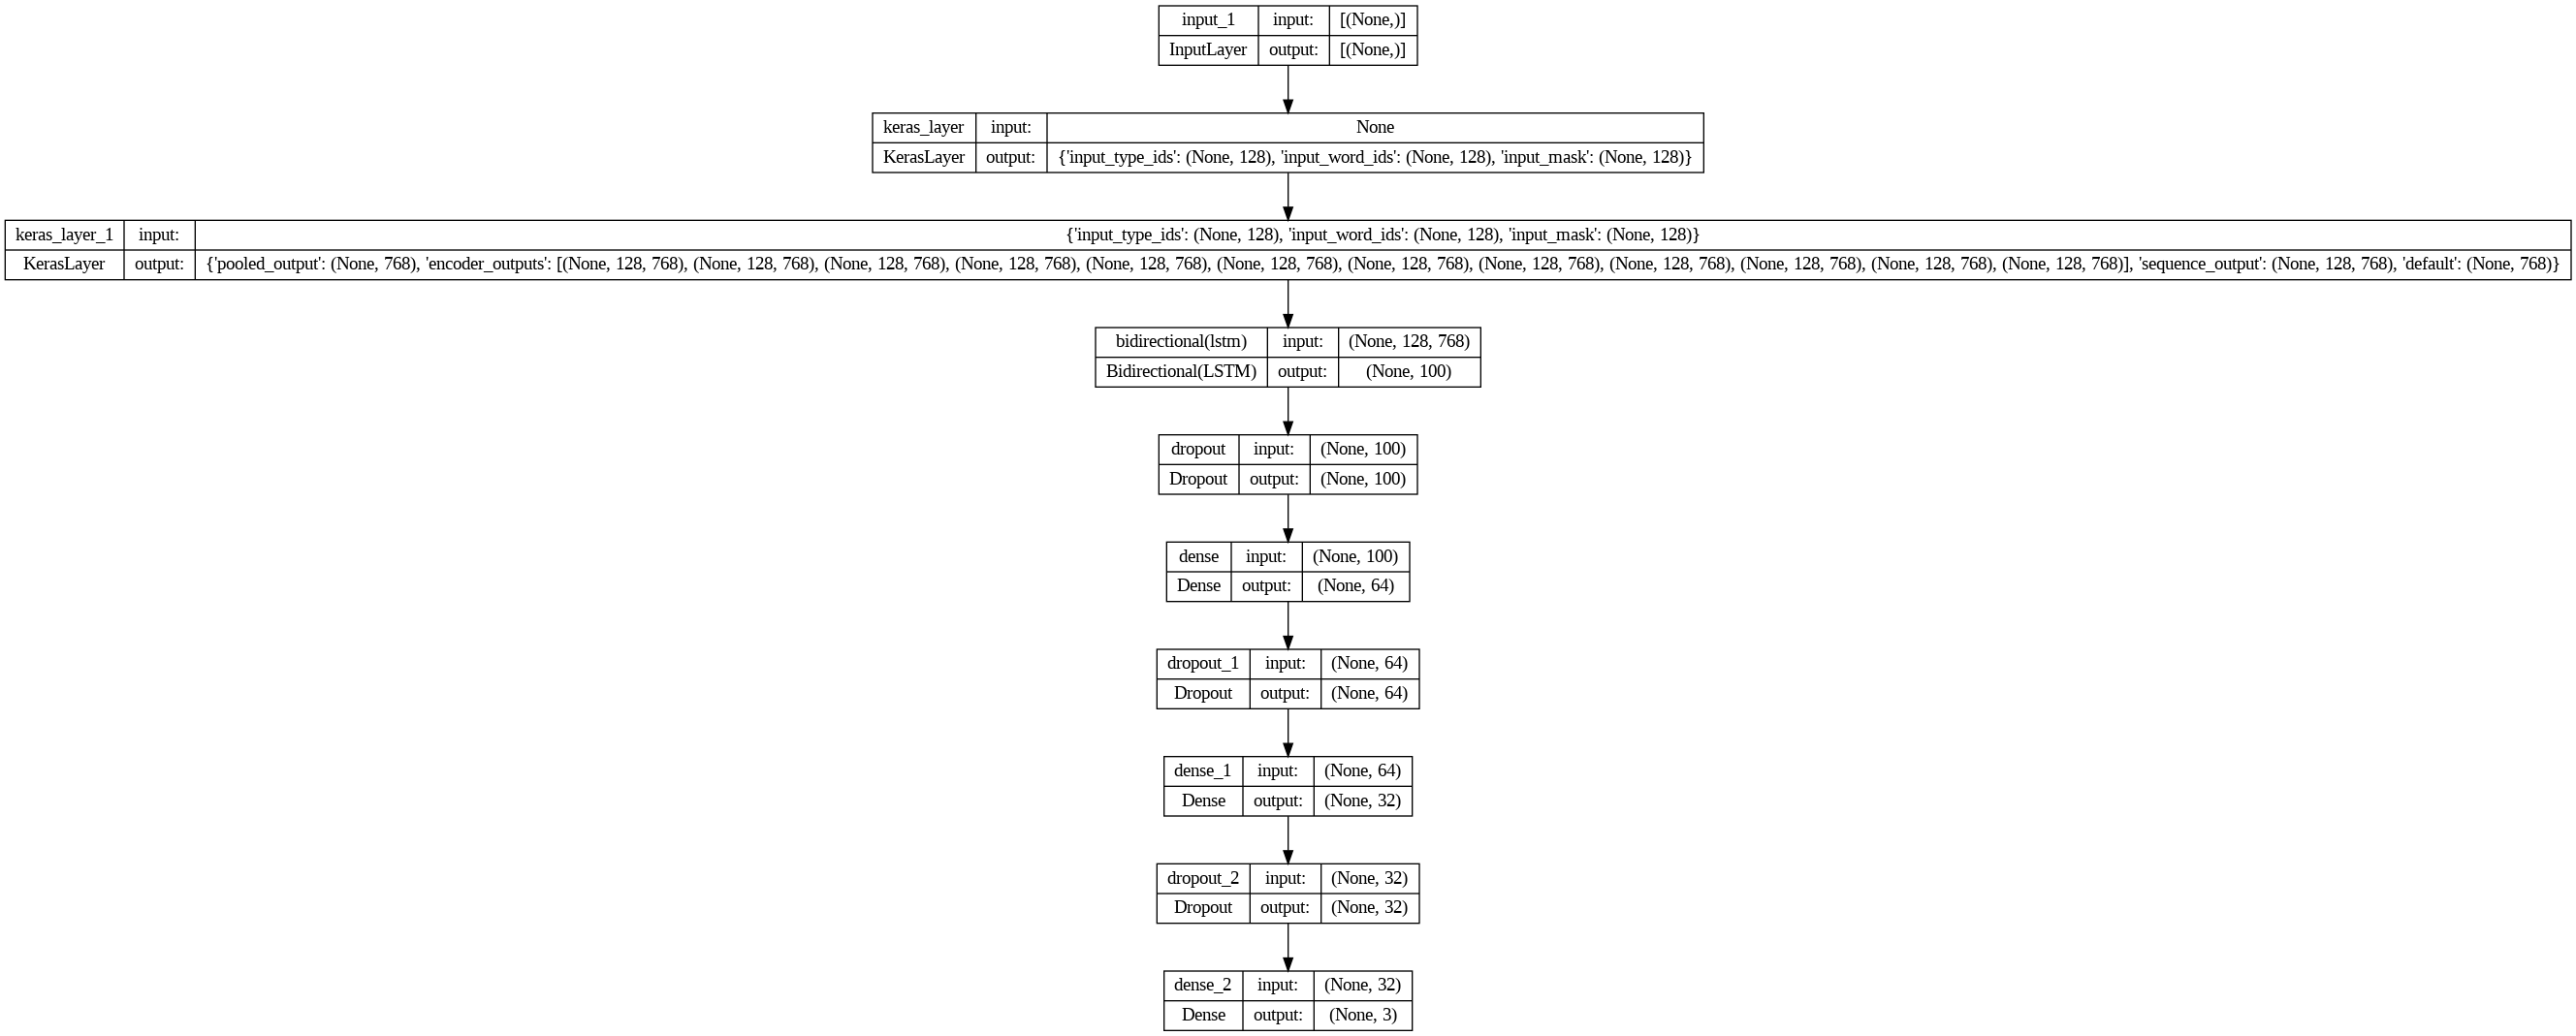

In [ ]:
import tensorflow.keras as keras
# model_name='bert lstm'
with open(f'{internship_folder_path}/{model_name}_info.txt','w') as f:
    f.write(f'''
[[2023-08-26]]-1613-35
after training for 20 epochs ; 10^-4 learning rate and trainable true
        bert according to  instructions https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4
        did enough text preprocessing as well
        data: airline tweets


    ''')
    old_stdout= sys.stdout
    sys.stdout = f
    model.summary()
    sys.stdout= old_stdout

reduce_lr_plateau=keras.callbacks.ReduceLROnPlateau(min_lr=10**(-7),patience=15)
csvlogger_callback=keras.callbacks.CSVLogger(
    filename=f'{internship_folder_path}/{model_name}_CSV_epochs_stats.csv',
    append=True
    )

keras.utils.plot_model(model, to_file=f'{internship_folder_path}/{model_name}_layers_img.png', show_shapes=True)




In [ ]:
X_train_to_use_tf=tf.constant(X_train_to_use.tolist())
### X_train_to_use=X_train_to_use_tf



In [ ]:
X_test_to_use_tf=tf.constant(X_test_to_use.tolist())
#### X_test_to_use=X_test_to_use_tf

In [ ]:
X_train_to_use

array([[" you really should be more proactive with passengers when you know the entertainment system is n't working. at least let me get a mag"],
       [' we done it with 1 truck. no biggie grinningfacewithsmilingeyesemoji'],
       [' thank you. we are finally at the gate.'],
       ...,
       [' flew ord to miami and back and had great crew, service on both legs. thanks'],
       [" i owe you an apology. my tweet was out of frustration, not constructive criticism. i 'm a sw fan love your service!"],
       [' in miami and the agents rachel wong and marisol pimentel were very pleasant in a world of chaos a big .thank. you.']],
      dtype=object)

In [ ]:
# y_train_to_use = np.asarray(y_train_to_use).astype('float32')

In [ ]:
# y_train_to_use.shape


In [ ]:
# print(X_train_to_use.shape)

# print(X_train_to_use_tf.shape)
# y_train_resampled.shape

In [ ]:
trainable_bert_layer_bool=True

model_name=f'bert lstm 2023-08-25; bert_layer_trainable={trainable_bert_layer_bool}'

for layer in model.layers[1:3]:
    print(layer.name)
    layer.trainable=trainable_bert_layer_bool

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(learning_rate=10**(-4)), metrics = ['accuracy'])


keras_layer
keras_layer_1


In [ ]:
callbacks_list=[csvlogger_callback,reduce_lr_plateau]
history1 = model.fit(X_train_to_use_tf,
                    y_train_to_use,
                    epochs = 20,
                    batch_size = 64,
                    callbacks=callbacks_list,
                    #  class_weight=class_weight_dict
                    validation_data=[tf.constant(X_test_to_use),y_test_to_use_ohe]
                    )

# history1 = model.fit(dataset,
#                     epochs = 5,
#                     batch_size = 32,
#                     callbacks=callbacks_list,
#                     # validation_data=[X_test_to_use,y_test_to_use_ohe]
                    # )

Epoch 1/20


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.


278/278 [==============================] - 639s 2s/step - loss: 0.2819 - accuracy: 0.9189 - val_loss: 0.3620 - val_accuracy: 0.9207 - lr: 1.0000e-04
Epoch 2/20
278/278 [==============================] - 557s 2s/step - loss: 0.1021 - accuracy: 0.9721 - val_loss: 0.3155 - val_accuracy: 0.9149 - lr: 1.0000e-04
Epoch 3/20
278/278 [==============================] - 558s 2s/step - loss: 0.0630 - accuracy: 0.9834 - val_loss: 0.3844 - val_accuracy: 0.9226 - lr: 1.0000e-04
Epoch 4/20
278/278 [==============================] - 557s 2s/step - loss: 0.0568 - accuracy: 0.9866 - val_loss: 0.6870 - val_accuracy: 0.8781 - lr: 1.0000e-04
Epoch 5/20
278/278 [==============================] - 557s 2s/step - loss: 0.0698 - accuracy: 0.9821 - val_loss: 0.3106 - val_accuracy: 0.9211 - lr: 1.0000e-04
Epoch 6/20
278/278 [==============================] - 557s 2s/step - loss: 0.0393 - accuracy: 0.9901 - val_loss: 0.5246 - val_accuracy: 0.9230 - lr: 1.0000e-04
Epoch 7/20
243/278 [=========================>....]

KeyboardInterrupt: ignored

In [ ]:
# loss, accuracy=model.evaluate(tf.constant(X_test_to_use),y_test_to_use_ohe)

66/66 [==============================] - 25s 376ms/step - loss: 0.7664 - accuracy: 0.9183


In [ ]:
y_pred=model.predict(tf.constant(X_test_to_use))

66/66 [==============================] - 25s 359ms/step


In [ ]:
print(y_pred.shape)
### convert the ohe target cols to without ohencoding ## see https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas
y_pred_nonohe=pd.DataFrame(y_pred).idxmax(axis=1)
y_test_nonohe=pd.DataFrame(y_test_to_use_ohe).idxmax(axis=1)

(2092, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


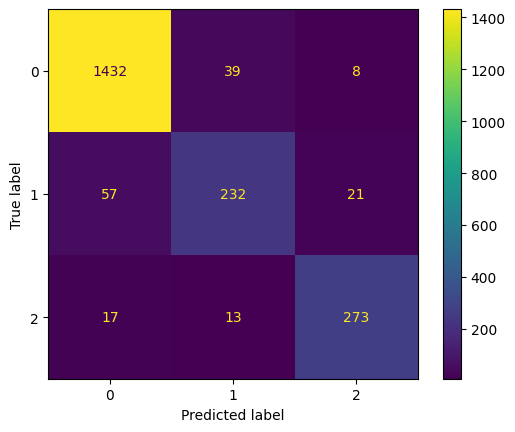

accuracy is  0.9259082217973231 

recall for class 1 is  0.8725329890837674 

precision for class 1 is  0.8905793773986334 

recall for class 0 is  0.8725329890837674 

precision for class 0 is  0.8905793773986334 

f_score is for class 1 0.8814638260728763 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

In [ ]:
from datetime import datetime
import pickle
result_dict.update({f'{model_name}':get_conf_fscore(y_test_nonohe,y_pred_nonohe)})

dbfile = open(f'{internship_folder_path}/result_dict_{datetime.today().strftime("%Y-%m-%d")}.pkl', 'wb')

pickle.dump(result_dict, dbfile)
dbfile.close()


In [112]:
path_var='/content/drive/MyDrive/ml-ai files arjun/tcs_internship/result_dict_2023-08-26 11:50:19.720599.pkl'
dbfile = open(path_var, 'rb')

result_dict_temp=pickle.load( dbfile)
dbfile.close()
result_dict_pand=pd.DataFrame(result_dict_temp)
result_dict_pand.to_csv(path_var)
result_dict_pand

UnpicklingError: ignored

In [118]:
path_var='/content/drive/MyDrive/ml-ai files arjun/tcs_internship/result_dict_2023-08-25 12:36:33.927940.csv'
pd.read_csv(path_var).transpose()

,0,1,2,3
Unnamed: 0,accuracy,fscore_1,precision_1,recall_1
bert multi dense; bert_layer_trainable- False,0.817878,0.765169,0.721984,0.813849


### basic ML models

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from matplotlib import pyplot as plt

result_dict={}

In [ ]:




# count=0
y_train=pd.DataFrame(y_train).astype('category')
y_test=pd.DataFrame(y_test).astype('category')

## do the common text preprocessing

X_train_basic_prepro=TextPreprocessor().fit_transform(X_train)
X_test_basic_prepro=TextPreprocessor().fit_transform(X_test)

print('X_train \n',X_train.head().to_markdown())
print('X_train_basic_prepro \n',X_train_basic_prepro.head().to_markdown())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
<ipython-input-33-c5a585f97204>:62: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/usr/local/lib/python3.10/dist-packages/textblob/_text.py:1331: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/textblob/en/en-spelling.txt' mode='r' encoding='utf-8'>
  for x in _read(self._path):
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


X_train 
 |       | text                                                                                                                                              |
|------:|:--------------------------------------------------------------------------------------------------------------------------------------------------|
|  6983 | @JetBlue you really should be more proactive with passengers when you know the entertainment system isn't working. At least let me get a mag      |
| 11969 | @AmericanAir @Clarkey_19 we done it with 1 truck... No biggie 😄                                                                                  |
|  7524 | @JetBlue thank you. We are finally at the gate.                                                                                                   |
| 14342 | @AmericanAir u Cancelled Flightled my flight for tomorrow and tell me to call reservations but then refuse to take my call!!!  #not cool #hateful |
|   987 | @united Asked Flight attendant wh

In [ ]:
### oversampler pipeline transformer
##  imblearn
# from imblearn.pipeline import Pipeline
import imblearn
from imblearn.over_sampling import SMOTENC, RandomOverSampler
# over= RandomOverSampler(random_state=1)
# X_train_resampled, y_train_resampled= over.fit_resample(X_train_to_use,y_train.astype('category'))
# X_train_to_use=X_train_resampled
# y_train_to_use=y_train_resampled

oversample_log_regre_pipe= imblearn.pipeline.Pipeline([('oversampler',RandomOverSampler(random_state=1)),('algo_inst',LogisticRegression())])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


google_pipeline
Pipeline here 
google_pipeline here 
google_pipeline_RandomForestClassifier   testing accuracy is   0.7889952153110048
google_pipeline_RandomForestClassifier   training accuracy is   0.9989220265900107


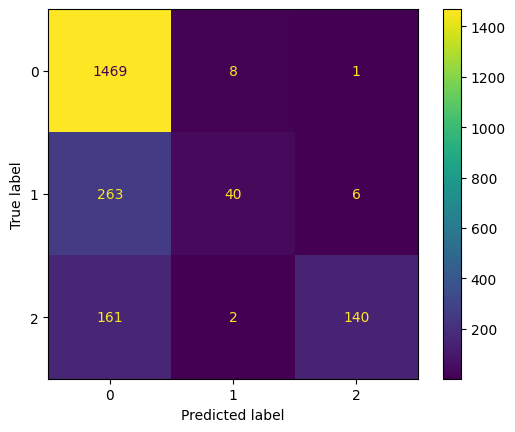

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.7889952153110048 

recall for class 1 is  0.5284689109766502 

precision for class 1 is  0.842799285588509 

recall for class 0 is  0.5284689109766502 

precision for class 0 is  0.842799285588509 

f_score is for class 1 0.6496077452135297 

google_pipeline_Pipeline   testing accuracy is   0.7564593301435407
google_pipeline_Pipeline   training accuracy is   0.7682357168523176


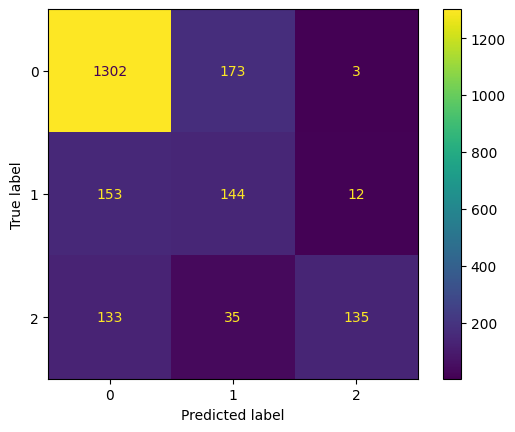

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.7564593301435407 

recall for class 1 is  0.5974947114375901 

precision for class 1 is  0.7096633844744676 

recall for class 0 is  0.5974947114375901 

precision for class 0 is  0.7096633844744676 

f_score is for class 1 0.6487663893915441 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


google_pipeline_LogisticRegression   testing accuracy is   0.8703349282296651
google_pipeline_LogisticRegression   training accuracy is   0.8766319319679003


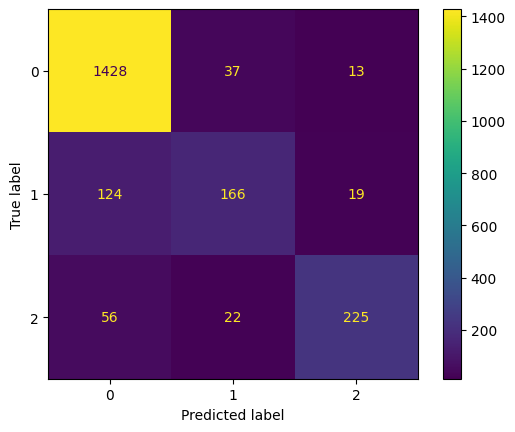

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8703349282296651 

recall for class 1 is  0.7486538621937656 

precision for class 1 is  0.8337746201977575 

recall for class 0 is  0.7486538621937656 

precision for class 0 is  0.8337746201977575 

f_score is for class 1 0.7889248665024345 



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


skgram_w2v_pipeline
Pipeline here 
skgram_w2v_pipeline here 
skgram_w2v_pipeline_RandomForestClassifier   testing accuracy is   0.8268770923003348
skgram_w2v_pipeline_RandomForestClassifier   training accuracy is   0.9988016776512882


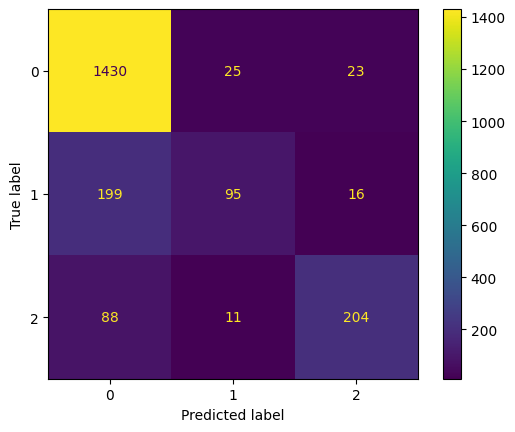

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8268770923003348 

recall for class 1 is  0.6490808734284751 

precision for class 1 is  0.7991816677385278 

recall for class 0 is  0.6490808734284751 

precision for class 0 is  0.7991816677385278 

f_score is for class 1 0.7163528989788773 

skgram_w2v_pipeline_Pipeline   testing accuracy is   0.6269727403156384
skgram_w2v_pipeline_Pipeline   training accuracy is   0.6254044337926903


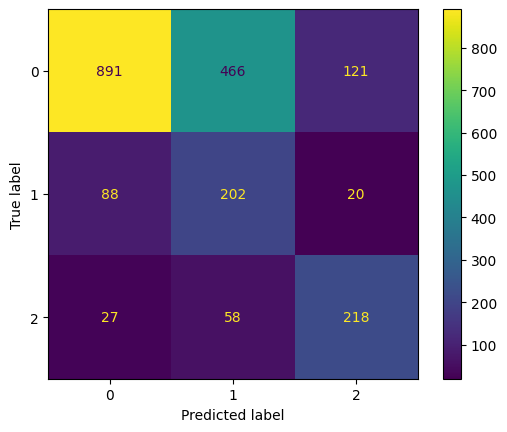

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.6269727403156384 

recall for class 1 is  0.6579755094545642 

precision for class 1 is  0.590388379708423 

recall for class 0 is  0.6579755094545642 

precision for class 0 is  0.590388379708423 

f_score is for class 1 0.6223523417922041 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


skgram_w2v_pipeline_LogisticRegression   testing accuracy is   0.8139646102343376
skgram_w2v_pipeline_LogisticRegression   training accuracy is   0.822528460155782


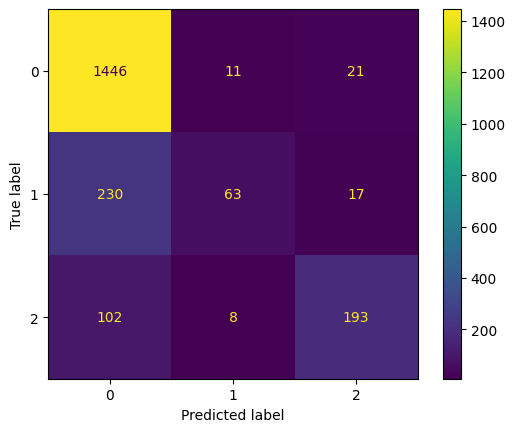

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8139646102343376 

recall for class 1 is  0.6061795410847558 

precision for class 1 is  0.805687953085687 

recall for class 0 is  0.6061795410847558 

precision for class 0 is  0.805687953085687 

f_score is for class 1 0.6918376627772105 

bow_pipeline
Pipeline here 
bow_pipeline here 
bow_pipeline_RandomForestClassifier   testing accuracy is   0.8379541108986616
bow_pipeline_RandomForestClassifier   training accuracy is   0.9829070045421946


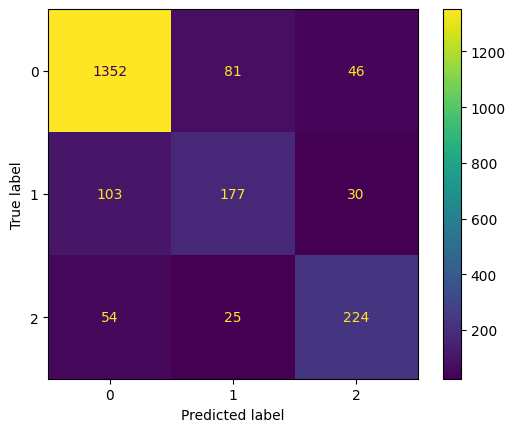

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8379541108986616 

recall for class 1 is  0.7414576130124954 

precision for class 1 is  0.7560219835287451 

recall for class 0 is  0.7414576130124954 

precision for class 0 is  0.7560219835287451 

f_score is for class 1 0.7486689723010963 

bow_pipeline_Pipeline   testing accuracy is   0.530114722753346
bow_pipeline_Pipeline   training accuracy is   0.5494860148218982


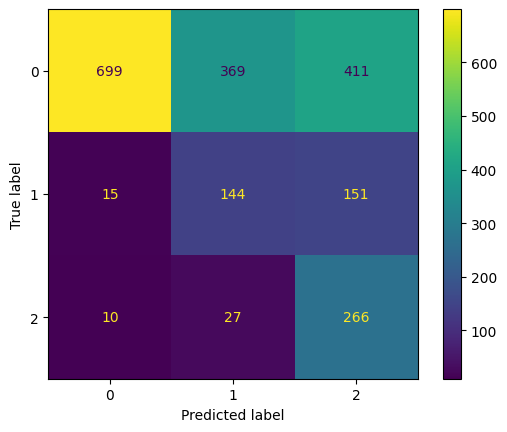

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.530114722753346 

recall for class 1 is  0.6050068502237255 

precision for class 1 is  0.5177974395245594 

recall for class 0 is  0.6050068502237255 

precision for class 0 is  0.5177974395245594 

f_score is for class 1 0.558015320748185 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


bow_pipeline_LogisticRegression   testing accuracy is   0.8451242829827916
bow_pipeline_LogisticRegression   training accuracy is   0.8793927803012193


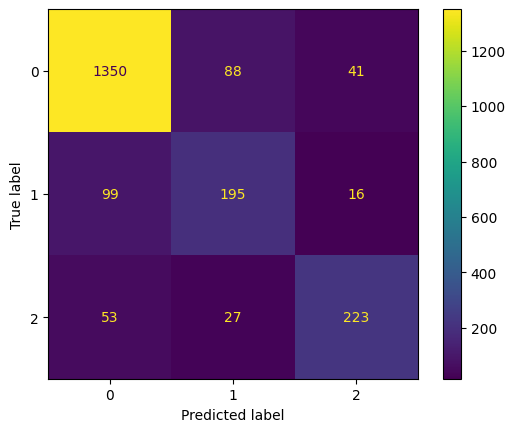

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8451242829827916 

recall for class 1 is  0.7592615866965221 

precision for class 1 is  0.7747541424541983 

recall for class 0 is  0.7592615866965221 

precision for class 0 is  0.7747541424541983 

f_score is for class 1 0.766929632234145 

tfidf_pipeline
Pipeline here 
tfidf_pipeline here 
tfidf_pipeline_RandomForestClassifier   testing accuracy is   0.864244741873805
tfidf_pipeline_RandomForestClassifier   training accuracy is   0.9971312455175712


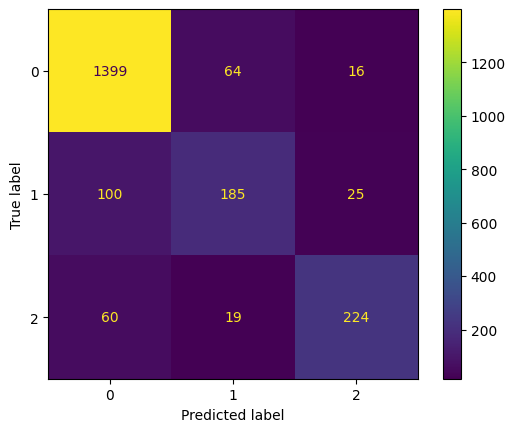

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.864244741873805 

recall for class 1 is  0.760652506394394 

precision for class 1 is  0.81098387845829 

recall for class 0 is  0.760652506394394 

precision for class 0 is  0.81098387845829 

f_score is for class 1 0.7850122658652591 

tfidf_pipeline_Pipeline   testing accuracy is   0.6821223709369025
tfidf_pipeline_Pipeline   training accuracy is   0.7905809227826919


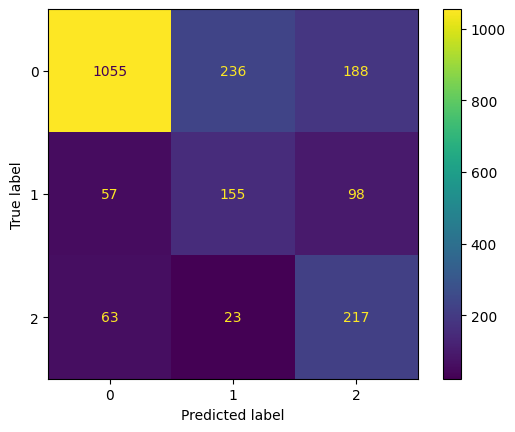

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.6821223709369025 

recall for class 1 is  0.6431638092815367 

precision for class 1 is  0.567893335502114 

recall for class 0 is  0.6431638092815367 

precision for class 0 is  0.567893335502114 

f_score is for class 1 0.603189440730127 

tfidf_pipeline_LogisticRegression   testing accuracy is   0.8790630975143403
tfidf_pipeline_LogisticRegression   training accuracy is   0.9177623715037054


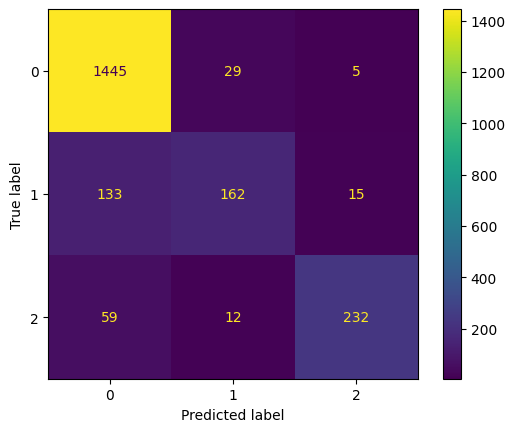

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8790630975143403 

recall for class 1 is  0.7550895690236432 

precision for class 1 is  0.8671255852811685 

recall for class 0 is  0.7550895690236432 

precision for class 0 is  0.8671255852811685 

f_score is for class 1 0.8072387719247061 



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


cbow_custom_w2v_pipeline
Pipeline here 
cbow_custom_w2v_pipeline here 
cbow_custom_w2v_pipeline_RandomForestClassifier   testing accuracy is   0.8230511716881874
cbow_custom_w2v_pipeline_RandomForestClassifier   training accuracy is   0.9988016776512882


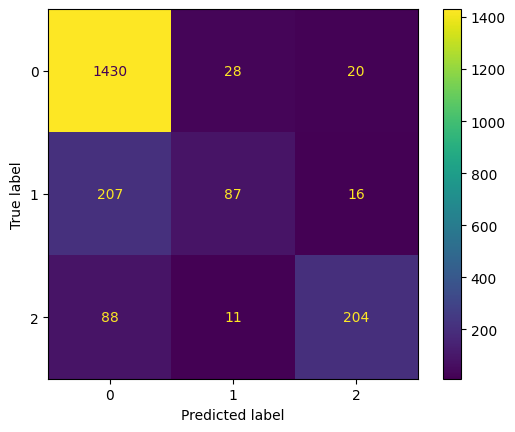

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.8230511716881874 

recall for class 1 is  0.6404787228908408 

precision for class 1 is  0.7898205659075224 

recall for class 0 is  0.6404787228908408 

precision for class 0 is  0.7898205659075224 

f_score is for class 1 0.7073530292955146 

cbow_custom_w2v_pipeline_Pipeline   testing accuracy is   0.6226685796269728
cbow_custom_w2v_pipeline_Pipeline   training accuracy is   0.6214499700419412


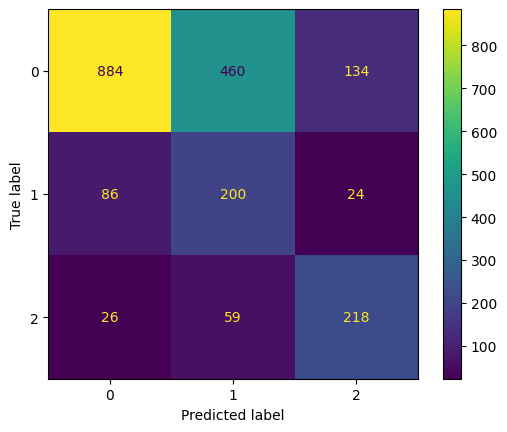

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


accuracy is  0.6226685796269728 

recall for class 1 is  0.6542462618517297 

precision for class 1 is  0.5818338505582317 

recall for class 0 is  0.6542462618517297 

precision for class 0 is  0.5818338505582317 

f_score is for class 1 0.6159190135408789 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


cbow_custom_w2v_pipeline_LogisticRegression   testing accuracy is   0.8149210903873745
cbow_custom_w2v_pipeline_LogisticRegression   training accuracy is   0.8168963451168364


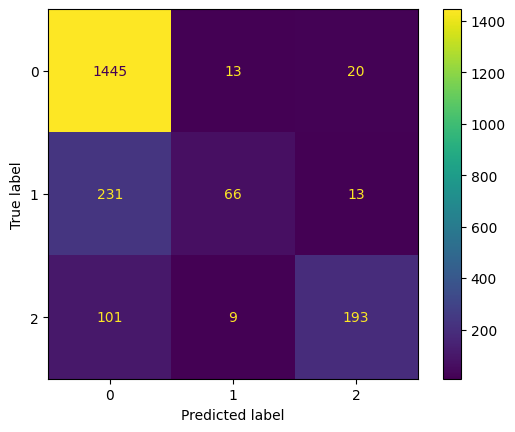

accuracy is  0.8149210903873745 

recall for class 1 is  0.6091798175408794 

precision for class 1 is  0.8057168539997311 

recall for class 0 is  0.6091798175408794 

precision for class 0 is  0.8057168539997311 

f_score is for class 1 0.6937982906903457 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


,accuracy,recall_1,precision_1,fscore_1
google_pipeline_RandomForestClassifier,0.788995,0.528469,0.842799,0.649608
google_pipeline_Pipeline,0.756459,0.597495,0.709663,0.648766
google_pipeline_LogisticRegression,0.870335,0.748654,0.833775,0.788925
skgram_w2v_pipeline_RandomForestClassifier,0.826877,0.649081,0.799182,0.716353
skgram_w2v_pipeline_Pipeline,0.621234,0.661441,0.575964,0.615750
skgram_w2v_pipeline_LogisticRegression,0.813965,0.606180,0.805688,0.691838
bow_pipeline_RandomForestClassifier,0.837954,0.741458,0.756022,0.748669
bow_pipeline_Pipeline,0.530115,0.605007,0.517797,0.558015
bow_pipeline_LogisticRegression,0.845124,0.759262,0.774754,0.766930
google_pipeline_GaussianNB,0.756459,0.597495,0.709663,0.648766


In [ ]:


# pipelines=[tfidf_pipeline,bow_pipeline,google_pipeline,cbow_custom_w2v_pipeline,skgram_w2v_pipeline]
# pipeline_names=['tfidf_pipeline','bow_pipeline','google_pipeline','cbow_custom_w2v_pipeline','skgram_w2v_pipeline']

pipelines=[google_pipeline,skgram_w2v_pipeline,bow_pipeline,tfidf_pipeline,cbow_custom_w2v_pipeline] ## testing
pipeline_names=['google_pipeline','skgram_w2v_pipeline','bow_pipeline','tfidf_pipeline','cbow_custom_w2v_pipeline']


# pipelines=[cbow_custom_w2v_pipeline,tfidf_pipeline] ## testing
# pipeline_names=['cbow_custom_w2v_pipeline','tfidf_pipeline']

# pipelines=[bow_pipeline] ## testing
# pipeline_names=['bow_pipeline']
# pipelines=[tfidf_pipeline,google_pipeline] ## testing
# pipeline_names=['tfidf_pipeline','google_pipeline']


# pipelines=[tfidf_pipeline,bow_pipeline,skgram_w2v_pipeline,google_pipeline] ## testing
# pipeline_names=['tfidf_pipeline','bow_pipeline','skgram_w2v_pipeline','google_pipeline']

# pipelines=[google_pipeline,tfidf_pipeline] ## testing
# pipeline_names=['google_pipeline','tfidf_pipeline']

for count,pipe in enumerate(pipelines):
    pipe_name=pipeline_names[count]

    X_train_transformed=pipe.fit_transform(X_train_basic_prepro)
    try:
        dropped_nan_index_train=pipe.named_steps['main'].nan_index.tolist()
        # X_train_transformed=X_train_transformed.drop(dropped_nan_index_train,axis=0)
        y_train_nan_dropped=y_train.drop(dropped_nan_index_train,axis=0)
    except Exception:
        y_train_nan_dropped=y_train

    X_test_transformed=pipe.transform(X_test_basic_prepro)

    try:
        dropped_nan_index_test=pipe.named_steps['main'].nan_index.tolist()
        y_test_nan_dropped=y_test.drop(dropped_nan_index_test,axis=0)
    except Exception:
        y_test_nan_dropped=y_test

    print(pipe_name)

    X_train_to_use=X_train_transformed
    X_test_to_use=X_test_transformed
    y_train_to_use=y_train_nan_dropped
    y_test_to_use=y_test_nan_dropped

    gaussiannb_inst=Pipeline([('sparsetodense',SparseToDenseArr()),('gaussiannb',GaussianNB())])
    gaussiannb_inst.instance_name='GaussianNB'

    multinomialnb_inst=Pipeline([('sparsetodense',SparseToDenseArr()),('gaussiannb',MultinomialNB())])
    multinomialnb_inst.instance_name='MultinomialNB'


    # type(pipe["main"]).__name__
    # algo_insts=[GaussianNB(),DecisionTreeClassifier(),LogisticRegression()] ##
    # algo_insts=[XGBClassifier(),AdaBoostClassifier(),LogisticRegression()] ##
    # algo_insts=[gaussiannb_inst,SVC(kernel='rbf'),RandomForestClassifier(class_weight=class_weight_dict)] ##

    # algo_insts=[multinomialnb_inst,RandomForestClassifier(class_weight=class_weight_dict),gaussiannb_inst,LogisticRegression()] ##
    algo_insts=[oversample_log_regre_pipe]






    ### with confusion matrix
    for algo_inst in algo_insts:

        # if ((type(algo_inst).__name__ == 'MultinomialNB') or (algo_inst.instance_name == 'multinomialnb_inst')) and ((pipe_name != 'tfidf_pipeline') or (pipe_name != 'bow_pipeline')):
        try:
            # algo_inst.instance_name
            # ismultnb_bool = ((algo_inst.instance_name == 'MultinomialNB') )
            inst_name=algo_inst.instance_name
        except AttributeError:
            inst_name= type(algo_inst).__name__
            # ismultnb_bool=False

        if (inst_name == 'MultinomialNB'  ) and ((pipe_name != 'tfidf_pipeline') or (pipe_name != 'bow_pipeline')):
            print(type(algo_inst).__name__ , 'here ')
            print(pipe_name , 'here ')

            continue

        y_train_to_use=pd.DataFrame(y_train_to_use)
        y_train_to_use=y_train_to_use.values.flatten()
        algo_inst.fit(X_train_to_use, y_train_to_use)
        y_pred=algo_inst.predict(X_test_to_use)
        accuracy=accuracy_score(y_test_to_use,y_pred)
        y_train_pred=algo_inst.predict(X_train_to_use)
        train_acc=accuracy_score(y_train_to_use,y_train_pred)
        # result_dict.update({f'{pipe_name}_{type(algo_inst).__name__}':{'accuracy':accuracy}})
        print(f'{pipe_name}_{type(algo_inst).__name__}   testing accuracy is  ',accuracy)
        print(f'{pipe_name}_{type(algo_inst).__name__}   training accuracy is  ',train_acc)

        # confusion_matrix= metrics.confusion_matrix(y_test_to_use,y_pred)
        # # display_labels=[0,1] ## (manual)
        # cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
        # cm_display.plot()
        # plt.show()


        # ### accuracy metrics
        # accuracy= metrics.accuracy_score(y_test_to_use,y_pred)
        # recall= metrics.recall_score(y_test_to_use,y_pred,average='macro')
        # # recall= metrics.recall_score(y_test_to_use,y_pred)
        # recall0= metrics.recall_score(y_test_to_use,y_pred,pos_label=0,average='macro')

        # precision= metrics.precision_score(y_test_to_use,y_pred,average='macro')
        # precision0= metrics.precision_score(y_test_to_use,y_pred,pos_label=0,average='macro')

        # f_score= 2*recall*precision/(recall+precision)

        # print('accuracy is ',accuracy, '\n')
        # print('recall for class 1 is ',recall, '\n')
        # print('precision for class 1 is ',precision, '\n')
        # print('recall for class 0 is ',recall0, '\n')
        # print('precision for class 0 is ',precision0, '\n')

        # print('f_score is for class 1',f_score, '\n')
        result_dict.update({f'{pipe_name}_{inst_name}':get_conf_fscore(y_test_to_use,y_pred)})


pd.DataFrame(result_dict).transpose()

In [ ]:
# len(tfidf_pipeline.named_steps['main'].named_transformers['tfidf'].vocabulary_)

In [ ]:
### to study the accuracy of the classification model (without any hyperparameter tuning)


from sklearn import metrics
from matplotlib import pyplot as plt

X_train_to_use=X_train_transformed
X_test_to_use=X_test_transformed
y_train_to_use=y_train_nan_dropped
y_test_to_use=y_test_nan_dropped

### confusion matrix

confusion_matrix= metrics.confusion_matrix(y_test_to_use,y_pred)
# display_labels=[0,1] ## (manual)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix )
cm_display.plot()
plt.show()


### accuracy metrics
accuracy= metrics.accuracy_score(y_test_to_use,y_pred)
recall= metrics.recall_score(y_test_to_use,y_pred,average='macro')
# recall= metrics.recall_score(y_test_to_use,y_pred)
recall0= metrics.recall_score(y_test_to_use,y_pred,pos_label=0,average='macro')

precision= metrics.precision_score(y_test_to_use,y_pred,average='macro')
precision0= metrics.precision_score(y_test_to_use,y_pred,pos_label=0,average='macro')

f_score= 2*recall*precision/(recall+precision)

print('accuracy is ',accuracy, '\n')
print('recall for class 1 is ',recall, '\n')
print('precision for class 1 is ',precision, '\n')
print('recall for class 0 is ',recall0, '\n')
print('precision for class 0 is ',precision0, '\n')

print('f_score is for class 1',f_score, '\n')

# result_dict.update({str(type(algo_class).__name__):{'accuracy':accuracy, 'recall':recall,'precision':precision,'f_score':f_score}})


### bias and variance
# error_rate=1-accuracy
# train_accuracy=  metrics.accuracy_score(y_train_to_use,y_train_pred)
# variance_measure=np.abs(train_accuracy - accuracy)
# print('a measure of bias =',error_rate,'\na measure of variance =',variance_measure)

In [ ]:
import pickle
from datetime import datetime

# preprocessed_data=[X_train,X_test,y_train,y_test]
# dbfile = open(f'{drive_project_folder_path}/preprocessed_data.pkl', 'wb')

# pickle.dump(preprocessed_data, dbfile)
# dbfile.close()

# import pickle
dbfile = open(f'{drive_project_folder_path}/result_dict_{datetime.today().strftime("%Y-%m-%d")}.pkl', 'wb')
pickle.dump(result_dict, dbfile)
dbfile.close()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### NN models

In [ ]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# text_col=X[text_col_name]
# all_words = " ".join(text_col)
# all_words = word_tokenize(all_words)
# dist = FreqDist(all_words)
# del all_words
# num_unique_word = len(dist)

# ### get max words per document
# r_len = []

# for text in X:
#     words = word_tokenize(text)
#     l = len(words)
#     r_len.append(l)

# MAX_TWEET_LEN = np.max(r_len)
# del r_len
# class TensorflowTokenizer(DummyTransformer):
#     def transform(self,X=None):
#         # text_col=X[text_col_name]
#         text_col=X
#         tokenizer = Tokenizer(num_words = num_unique_word)
#         tokenizer.fit_on_texts(list(text_col))
#         text_col= tokenizer.texts_to_sequences(text_col)
#         text_col = sequence.pad_sequences(text_col, MAX_TWEET_LEN)
#         return text_col

class TensorflowTokenizer(DummyTransformer):
    def fit(self,X):
        self.text_col_name=text_col_name

        if  len(X.shape)==1:
            text_col=X
        elif X.shape[1]==1 :
            text_col=X


        else:

            text_col=X[self.text_col_name]

        all_words = " ".join(text_col)
        all_words = word_tokenize(all_words)
        dist = FreqDist(all_words)
        del all_words
        self.num_unique_word = len(dist)

        ### get max words per document
        r_len = []

        for text in X:
            words = word_tokenize(text)
            l = len(words)
            r_len.append(l)

        self.MAX_TWEET_LEN = np.max(r_len)
        del r_len
        return self

    def transform(self,X=None):
        # text_col=X[text_col_name]
        if  len(X.shape)==1:
            text_col=X
        elif X.shape[1]==1 :
            text_col=X


        else:
            text_col=X[self.text_col_name]

        tokenizer = Tokenizer(num_words = self.num_unique_word)
        tokenizer.fit_on_texts(list(text_col))
        text_col= tokenizer.texts_to_sequences(text_col)
        text_col = sequence.pad_sequences(text_col, self.MAX_TWEET_LEN)
        return text_col


keras_pipe= Pipeline([('textpreprocessor',TextPreprocessor(method='rnn')),('tensorflowtokenizer',TensorflowTokenizer())])



pipe = keras_pipe
X_train_transformed=pipe.fit_transform(X_train)
X_test_transformed=pipe.transform(X_test)
X_train_to_use=X_train_transformed
X_test_to_use=X_test_transformed
y_train_to_use=y_train
y_test_to_use=y_test


num_unique_word=keras_pipe.named_steps['tensorflowtokenizer'].num_unique_word
MAX_TWEET_LEN=keras_pipe.named_steps['tensorflowtokenizer'].MAX_TWEET_LEN


In [ ]:
# TensorflowTokenizer().fit_transform(X_train_basic_prepro)
import tensorflow.keras as keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding,Flatten ,Bidirectional ,Conv1D,MaxPooling1D, GlobalMaxPooling1D,SpatialDropout1D

from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [ ]:
'''
model = Sequential()
model.add(Embedding(input_dim = num_unique_word, output_dim = 150, input_length = MAX_TWEET_LEN))

# model.add(Bidirectional(LSTM(128, dropout = 0.1, kernel_regularizer=regularizers.L1L2(l1=0.01,l2=0.01) )))

model.add(Bidirectional(LSTM(10))) ##[[2023-07-20]]-1202-25


model.add(Dense(num_targets, activation = "softmax"))
# model.add(Flatten())
'''

In [ ]:
# ### from https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-/
# ### train acc 99 test acc 65  after 20 epochs ; 1 min per epoch
# model = Sequential()
# model.add(Embedding(input_dim = num_unique_word, output_dim = 150, input_length = MAX_TWEET_LEN))

# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(num_targets, activation = "softmax"))

In [ ]:
### from https://www.analyticsvidhya.com/blog/2021/08/sentiment-analysis-using-bidirectional-stacked-lstm/
model = Sequential()
model.add(Embedding(input_dim = num_unique_word, output_dim = 150, input_length = MAX_TWEET_LEN))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1),dropout = 0.1, kernel_regularizer=regularizers.L1L2(l1=0.01,l2=0.01))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32,dropout = 0.2, kernel_regularizer=regularizers.L1L2(l1=0.005,l2=0.005))))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_targets, activation = "softmax"))

In [ ]:
y_train_to_use_ohe=y_train.astype(np.int).values.flatten() ## change y_train to y_train_to_use
# y_train_to_use_ohe=y_train_to_use.astype(np.int).flatten()

y_train_to_use=keras.utils.to_categorical(y_train_to_use_ohe,num_targets)
model.compile(loss = "categorical_crossentropy", optimizer = optimizers.Adam(lr=0.01), metrics = ['accuracy'])
# y_train_to_use = np.asarray(y_train_to_use).astype('float32').reshape((-1,1))
# y_train_to_use

In [ ]:
model_name='analyticsvidhya_stacked_bilstm'
with open(f'{internship_folder_path}/{model_name}_info.txt','w') as f:
    f.write(f'''
        bidirectional lstm with default kernel regularisation l1l2
        optimizers.Adam(lr=0.01)
        ### from https://www.analyticsvidhya.com/blog/2021/08/sentiment-analysis-using-bidirectional-stacked-lstm/

    ''')
    old_stdout= sys.stdout
    sys.stdout = f
    model.summary()
    sys.stdout= old_stdout


reduce_lr_plateau=keras.callbacks.ReduceLROnPlateau(min_lr=10**(-7),patience=15)
csvlogger_callback=keras.callbacks.CSVLogger(
    filename=f'{internship_folder_path}/{model_name}_CSV_epochs_stats.csv',
    append=True
    )


In [ ]:
y_test_to_use_ohe=keras.utils.to_categorical(y_test_to_use.astype(np.int).values.flatten(),num_targets)

callbacks_list=[csvlogger_callback]
history1 = model.fit(X_train_to_use,
                    y_train_to_use,
                    epochs = 70,
                    batch_size = 32,
                    callbacks=callbacks_list,
                    validation_data=[X_test_to_use,y_test_to_use_ohe]
                    )

In [ ]:

# dbfile = open(f'{drive_project_folder_path}/model_lstm_2023-07-19_airline.pkl', 'wb')

# pickle.dump(model, dbfile)
# dbfile.close()

In [ ]:

eval_result=model.evaluate(X_test_to_use,y_test_to_use_ohe)
result_dict.update({f'keras':{'accuracy':eval_result[1]}})

pd.DataFrame(result_dict).transpose()
# pd.DataFrame(result_dict).transpose()

In [ ]:
callbacks_list=[csvlogger_callback,reduce_lr_plateau]

# callbacks_list=[csvlogger_callback]

history1 = model.fit(X_train_to_use,
                    y_train_to_use,
                    epochs = 500,
                    batch_size = 32,
                    callbacks=callbacks_list,
                    validation_data=[X_test_to_use,y_test_to_use_ohe]
                    )

In [ ]:
pd.DataFrame(result_dict).transpose()

In [ ]:
import pickle
# dbfile = open(f'{drive_project_folder_path}/pipelines.pkl', 'wb')

# pickle.dump(pipelines, dbfile)
# dbfile.close()


dbfile = open(f'{drive_project_folder_path}/result_dict_{datetime.today().strftime("%Y-%m-%d")}.pkl', 'wb')

pickle.dump(result_dict, dbfile)
dbfile.close()


# dbfile = open(f'{drive_project_folder_path}/history1.pkl', 'wb')

# pickle.dump(history1, dbfile)
# dbfile.close()

In [ ]:
### debug

# '/content/drive/MyDrive/ml-ai files arjun/result_dict_2023-07-19 05:14:23.609124.pkl'
# filepath='/content/drive/MyDrive/ml-ai files arjun/history1.pkl'
# dbfile = open(filepath, 'rb')

# result_dict_from_pkl=pickle.load(dbfile)
# dbfile.close()
# result_dict_from_pkl

In [ ]:
def build_conv_model(num_unique_word, MAX_TWEET_LEN):
    model3 = Sequential()
    model3.add(Embedding(input_dim = num_unique_word, output_dim = 150, input_length = MAX_TWEET_LEN))

    model3.add(Conv1D(64, kernel_size = 3, padding ="same", activation = "relu", strides = 1))
    model3.add(Dropout(0.2))

    model3.add(Conv1D(64, kernel_size = 3, padding ="same", activation = "relu", strides = 1))
    model3.add(Dropout(0.2))

    model3.add(GlobalMaxPooling1D())

    model3.add(Dense(128, activation = "relu"))

    model3.add(Dropout(0.2))

    model3.add(Dense(num_targets, activation = "softmax"))


    model3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return model3

model2=build_conv_model(num_unique_word, MAX_TWEET_LEN)
model2.fit(X_train_to_use, y_train_to_use, epochs = 50, batch_size = 32)

In [ ]:
# history1 = model.fit(X_train_to_use, y_train_to_use, epochs = 10, batch_size = 32)

In [ ]:
y_test_to_use_ohe=keras.utils.to_categorical(y_test_to_use.astype(np.int).values.flatten(),num_targets)

eval_result=model2.evaluate(X_test_to_use,y_test_to_use_ohe)
result_dict.update({f'keras_conv':{'accuracy':eval_result[1]}})

pd.DataFrame(result_dict).transpose()

In [ ]:
# eval_result=model.evaluate(X_test_to_use,y_test_to_use)
# result_dict.update({f'keras':{'accuracy':eval_result}})

# pd.DataFrame(result_dict).transpose()['accuracy'].max()

In [ ]:
import pickle
# dbfile = open(f'{drive_project_folder_path}/pipelines.pkl', 'wb')

# pickle.dump(pipelines, dbfile)
# dbfile.close()


dbfile = open(f'{drive_project_folder_path}/result_dict.pkl', 'wb')

pickle.dump(result_dict, dbfile)
dbfile.close()


# dbfile = open(f'{drive_project_folder_path}/history1.pkl', 'wb')

# pickle.dump(history1, dbfile)
# dbfile.close()


### NN models end

## DEBUG SNIPPETS

#### debug spellcheck timeit

In [ ]:
# nltk.download('words')
# SpellChecker().correction('evr')

In [ ]:
from functools import wraps
import time


def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [ ]:
# ! pip install pyspellchecker
nltk.download('words')

In [ ]:
## debug

from nltk.corpus import words


@timeit
def word_exists_spellchecker(word): ##  0.1677 seconds
    return (SpellChecker().unknown([word]))

@timeit
def word_exists_spellchecker(word): ##  0.1677 seconds
    return (SpellChecker().unknown([word]))

@timeit
def word_exists_spellchecker_correction(word): ##  0.1677 seconds
    return SpellChecker().correction(word)

word_set=set(words.words())
@timeit
def word_exists(word): ## TAKES Under  a microsecond ## FASTEST METHOD
    return (word in word_set)


word_to_use='under'
print(word_exists(word_to_use))
print(word_exists_spellchecker(word_to_use))
print(word_exists_spellchecker_correction(word_to_use))


if word_exists_spellchecker(word_to_use):
    print('word does not exist ')


## WRONG -SpellChecker seems to be better on average.


#### debug spellcheck timeit ends

#### spacy testing

In [ ]:

! pip install contextualSpellCheck

import contextualSpellCheck

In [ ]:
import pprint as pp

In [ ]:
### try using https://pypi.org/project/contextualSpellCheck/ instead.

## following doesn't work .. spacy_hunspell package is outdated i guess.

# ! sudo apt-get install libhunspell-dev
# ! pip install hunspell
# ! pip install spacy_hunspell

# import spacy
# from spacy_hunspell import spaCyHunSpell

# nlp = spacy.load('en_core_web_sm')
# hunspell = spaCyHunSpell(nlp, 'linux')
# nlp.add_pipe(hunspell)

# doc = nlp('I can haz cheezeburger.')
# haz = doc[2]
# haz._.hunspell_spell  # False
# haz._.hunspell_suggest

In [ ]:
import spacy


In [ ]:

nlp = spacy.load('en_core_web_sm')
contextualSpellCheck.add_to_pipe(nlp)
text='Income was $9.4 milion compared to the prior year of $2.7 milion.'
%time doc = nlp(text)
doc._.outcome_spellCheck

In [ ]:
text='I can haz cheezeburger.'
%time doc = nlp(text)
doc._.outcome_spellCheck


In [ ]:
text='I can haz cheezeburger.'

nlp = spacy.load('en_core_web_sm')
%time doc = nlp(text)


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
text='firsthashtag oh ! must get ! ! ! laughingoutloud mum still isnt convinced'
doc = nlp(text)
for token in doc:
    pp.pprint([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])

text='@joolzgirl oh no! u must get 1!!!lol mum still isnt convinced, and we have 3'
doc = nlp(text)
for token in doc:
    pp.pprint([token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop])


#### spacy testing ends

#### debug text preprocessing

In [ ]:
## debug
samp_sent='hello, i like cake ! ! ! ? ? ha ha ha!'
word_tokenize(samp_sent)

In [ ]:
orig=df[text_col_name][df.index[5]]
print(orig)

do_basic_text_preprocessing(orig,method='rnn')
# remove_stopwords(orig)
# fix_spelling_mistakes(df[text_col_name][57])

#### end of debug preprocessing

#### debug

In [ ]:
stopwords_raw_list=nltk.corpus.stopwords.words('english')
from nltk import pos_tag
pos_list=pos_tag(stopwords_raw_list)
pos_list=[pos_tag([word]) for word in stopwords_raw_list]
pos_list

In [ ]:
samp_sent="@FOX19Sara go girl ! ! Start your day out right ... you'll gotta love that!"
samp_sent="@Oblivion I know! I miss her..."
pos_tag(word_tokenize(samp_sent))

In [ ]:
## debug
text='Python is fun 👍  :P :S'
convert_emojis_emoticons_to_text(text)

#### debug over

In [ ]:
# ## debug
# print(df['text_col_name'][57])
# fix_spelling_mistakes(df['text_col_name'][57])

In [ ]:
# if SpellChecker().unknown(['the']):
#     print('inside if')

In [ ]:
### debug
text='hello there! how you doing?... is it too late for you??'
text.split()

In [ ]:
    # algo_insts=[RandomForestClassifier(class_weight=class_weight_dict)] ##

    # algo_insts=[DecisionTreeClassifier(class_weight=class_weight_dict),LogisticRegression(),XGBClassifier()] ##



    ### without confusion matrix
    # for algo_inst in algo_insts:
    #     y_train_to_use=pd.DataFrame(y_train_to_use)
    #     y_train_to_use=y_train_to_use.values.flatten()
    #     algo_inst.fit(X_train_to_use, y_train_to_use)
    #     y_pred=algo_inst.predict(X_test_to_use)
    #     accuracy=accuracy_score(y_test_to_use,y_pred)
    #     y_train_pred=algo_inst.predict(X_train_to_use)
    #     train_acc=accuracy_score(y_train_to_use,y_train_pred)
    #     result_dict.update({f'{pipe_name}_{type(algo_inst).__name__}':{'accuracy':accuracy}})
    #     print(f'{pipe_name}_{type(algo_inst).__name__}   testing accuracy is  ',accuracy)
    #     print(f'{pipe_name}_{type(algo_inst).__name__}   training accuracy is  ',train_acc)